In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN, AffinityPropagation, MeanShift
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

**1. Data Preprocessing [5 marks]:**

Clean and prepare the data. Remember to treat data issues, perform feature scaling, encoding and any other relevant transformations.
If applicable, use dimensionality reduction and discuss how it impacts the clusters.
Explain your data preparation process.

In [2]:
df = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/Data Science II/Assignment 2/Customer_Data.csv')

In [3]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [4]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
print(df['MINIMUM_PAYMENTS'].isna().sum() / df['MINIMUM_PAYMENTS'].count())

0.03623943498900081


Since the missing values only make up 3% of the data, I will drop them, as well as duplicates (if they exist).

In [6]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [7]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8636.000000   8636.000000          8636.000000   
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 94.785000      0.000000             0.500000   
75%                484.147500   1132.385490             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8636.000000                       8636.000000   
mean                     0.205909                          0.368820   
std                      0.300054                          0.398093   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8636.000000       8636.000000    8636.000000   8636.000000   
mean                 0.137604          3.313918      15.033233   4522.091030   
std                  0.201791          6.912506      25.180468   3659.240379   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      18.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8636.000000       8636.000000       8636.000000  8636.000000  
mean    1784.478099        864.304943          0.159304    11.534391  
std     2909.810090       2372.566350          0.296271     1.310984  
min        0.049513          0.019163          0.000000     6.000000  
25%      418.559237        169.163545          0.000000    12.000000  
50%      896.675701        312.452292          0.000000    12.000000  
75%     1951.142090        825.496463          0.166667    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In order to make the CUST_ID column easier to work with if needed, I will turn it into a numerical data type by removing the C, and make the column an integer. This will make all columns numerical and although CUST_ID won't be used in the clustering (since it's values are technically meaningless outside of identifying a customer), for ease of use/consistency amongst the columns, I'll do this anyway.

In [8]:
df['CUST_ID'] = df['CUST_ID'].map(lambda x: x.lstrip('C'))
df['CUST_ID'] = df['CUST_ID'].astype(int)

In [9]:
df.dtypes

CUST_ID                               int64
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

I have an idea for an additional feature which may be helpful, comparing the ratio of balance available to overall credit limit. I'll make that here and see if it can be helpful for clustering later on.

In [10]:
df['BALANCE_LIMIT_RATIO'] = (df['BALANCE']/ df['CREDIT_LIMIT'])

I want to get a better idea. I'll start by plotting the variables to get an idea of the distribution of data.

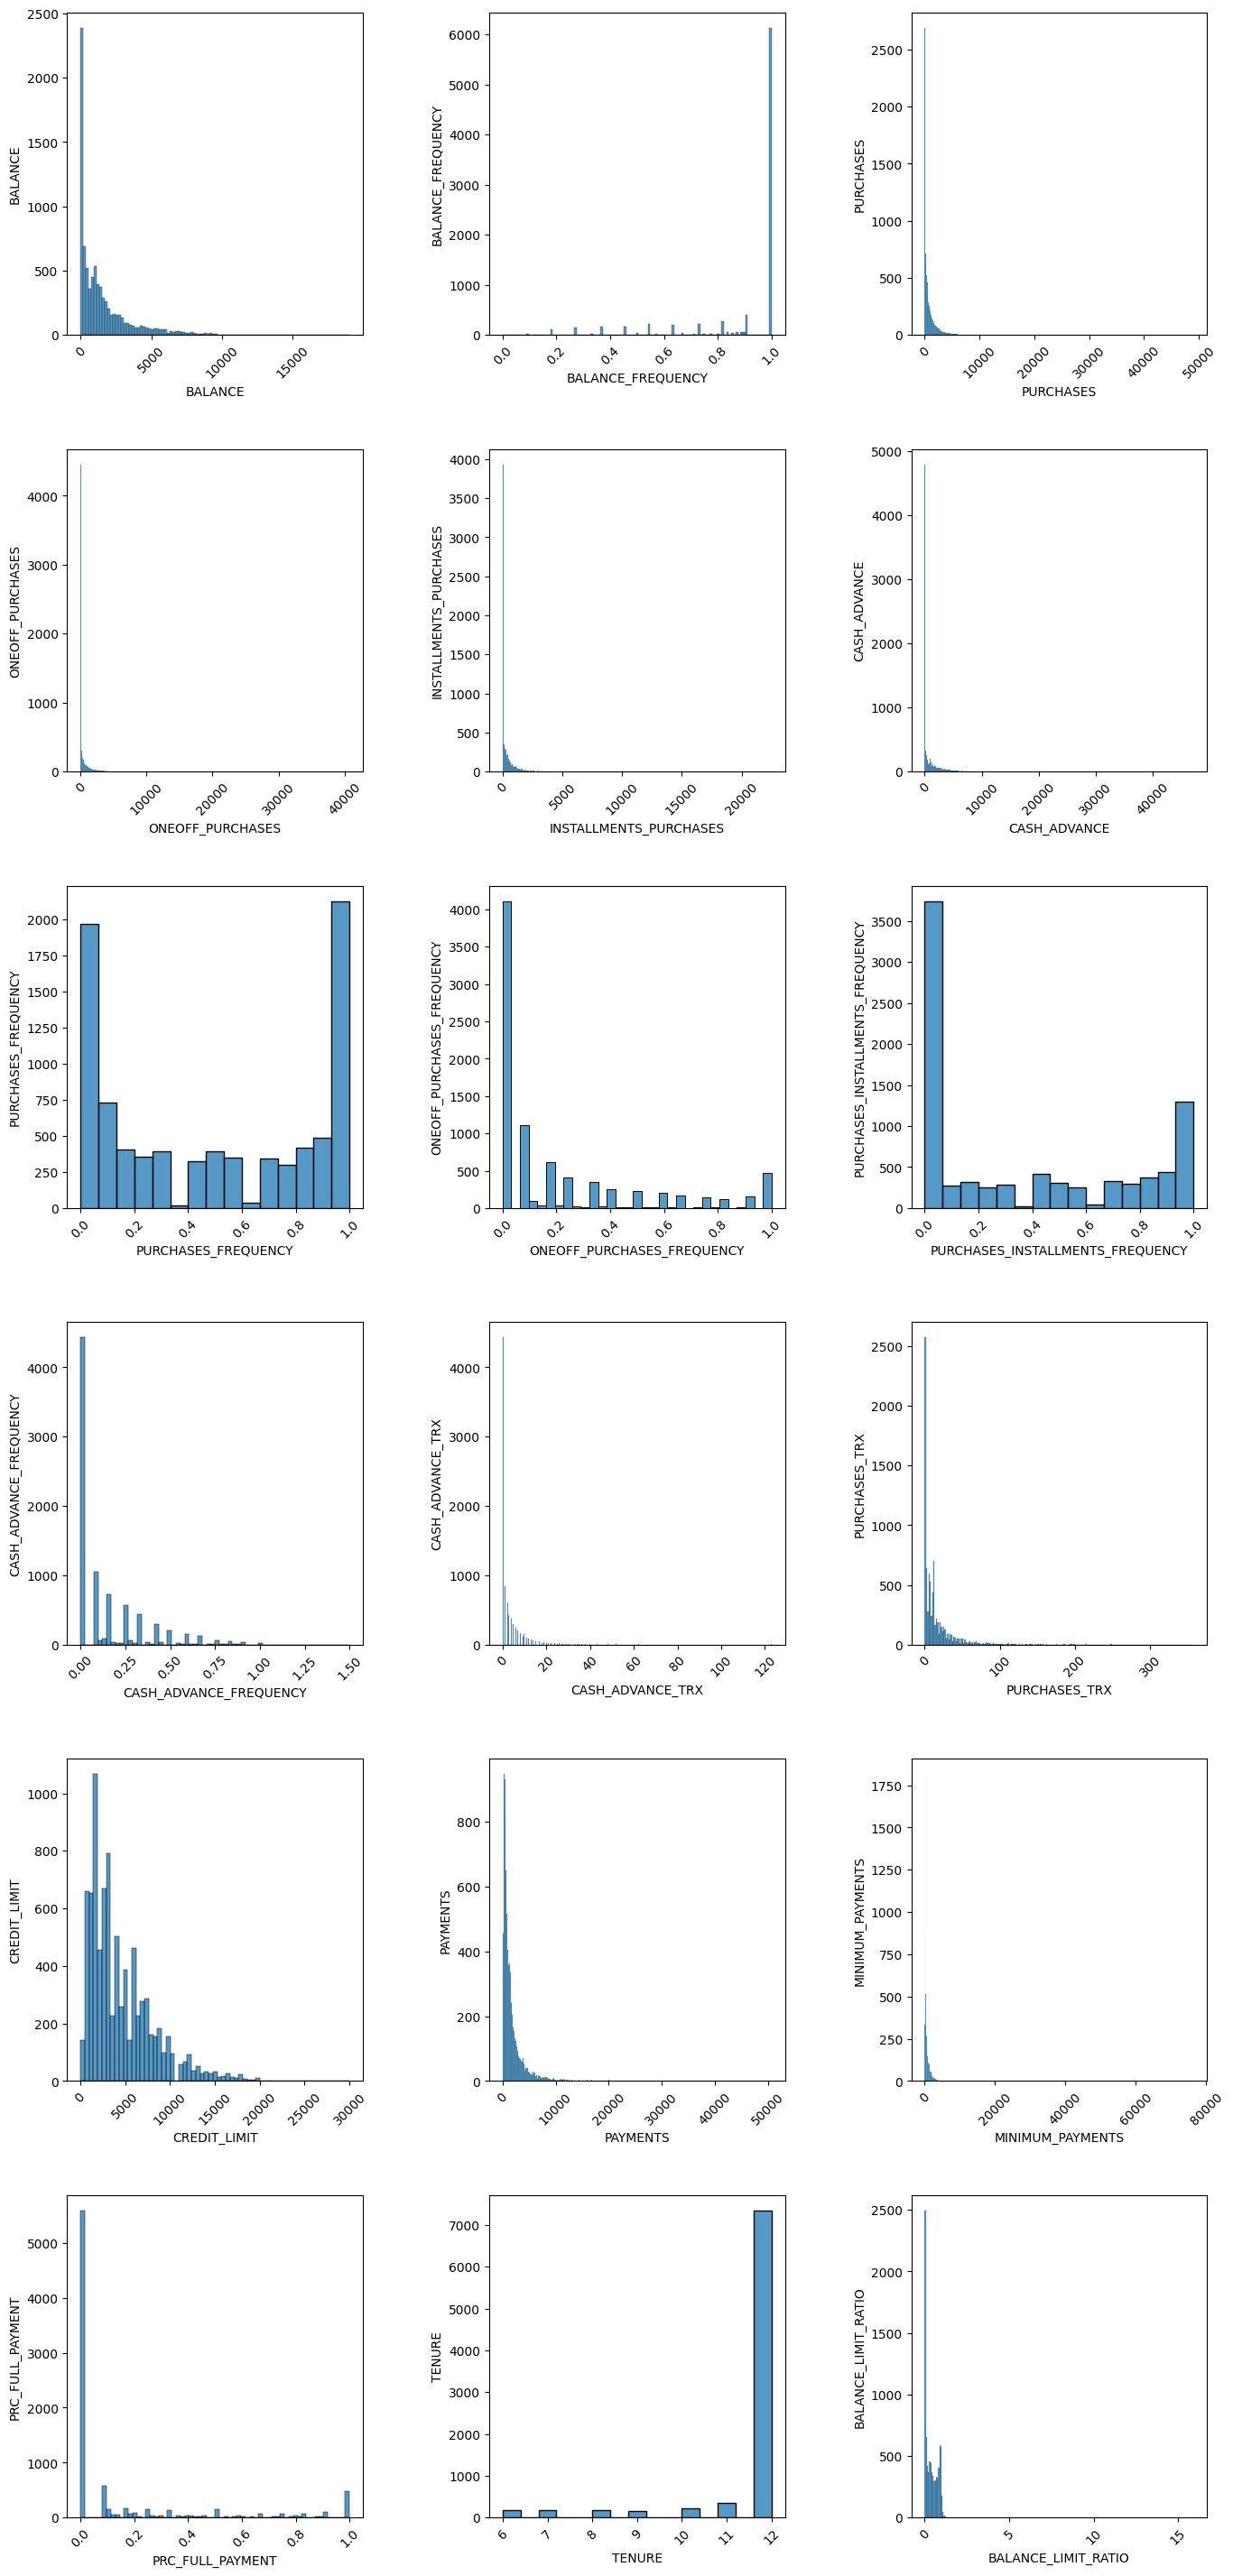

In [11]:
columns = df.columns.drop('CUST_ID')
num_rows = (len(columns)-1)//3+1
num_cols = 3


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=7.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)
    ax.tick_params(axis='x', rotation=45)
plt.show()

We can see many of the variables are right skewed, with high numbers on the low end, with very few on the high end. There also seems to possibly be many outliers on the higher end of the scale for some of these variables so I'll look to review this with boxplots.

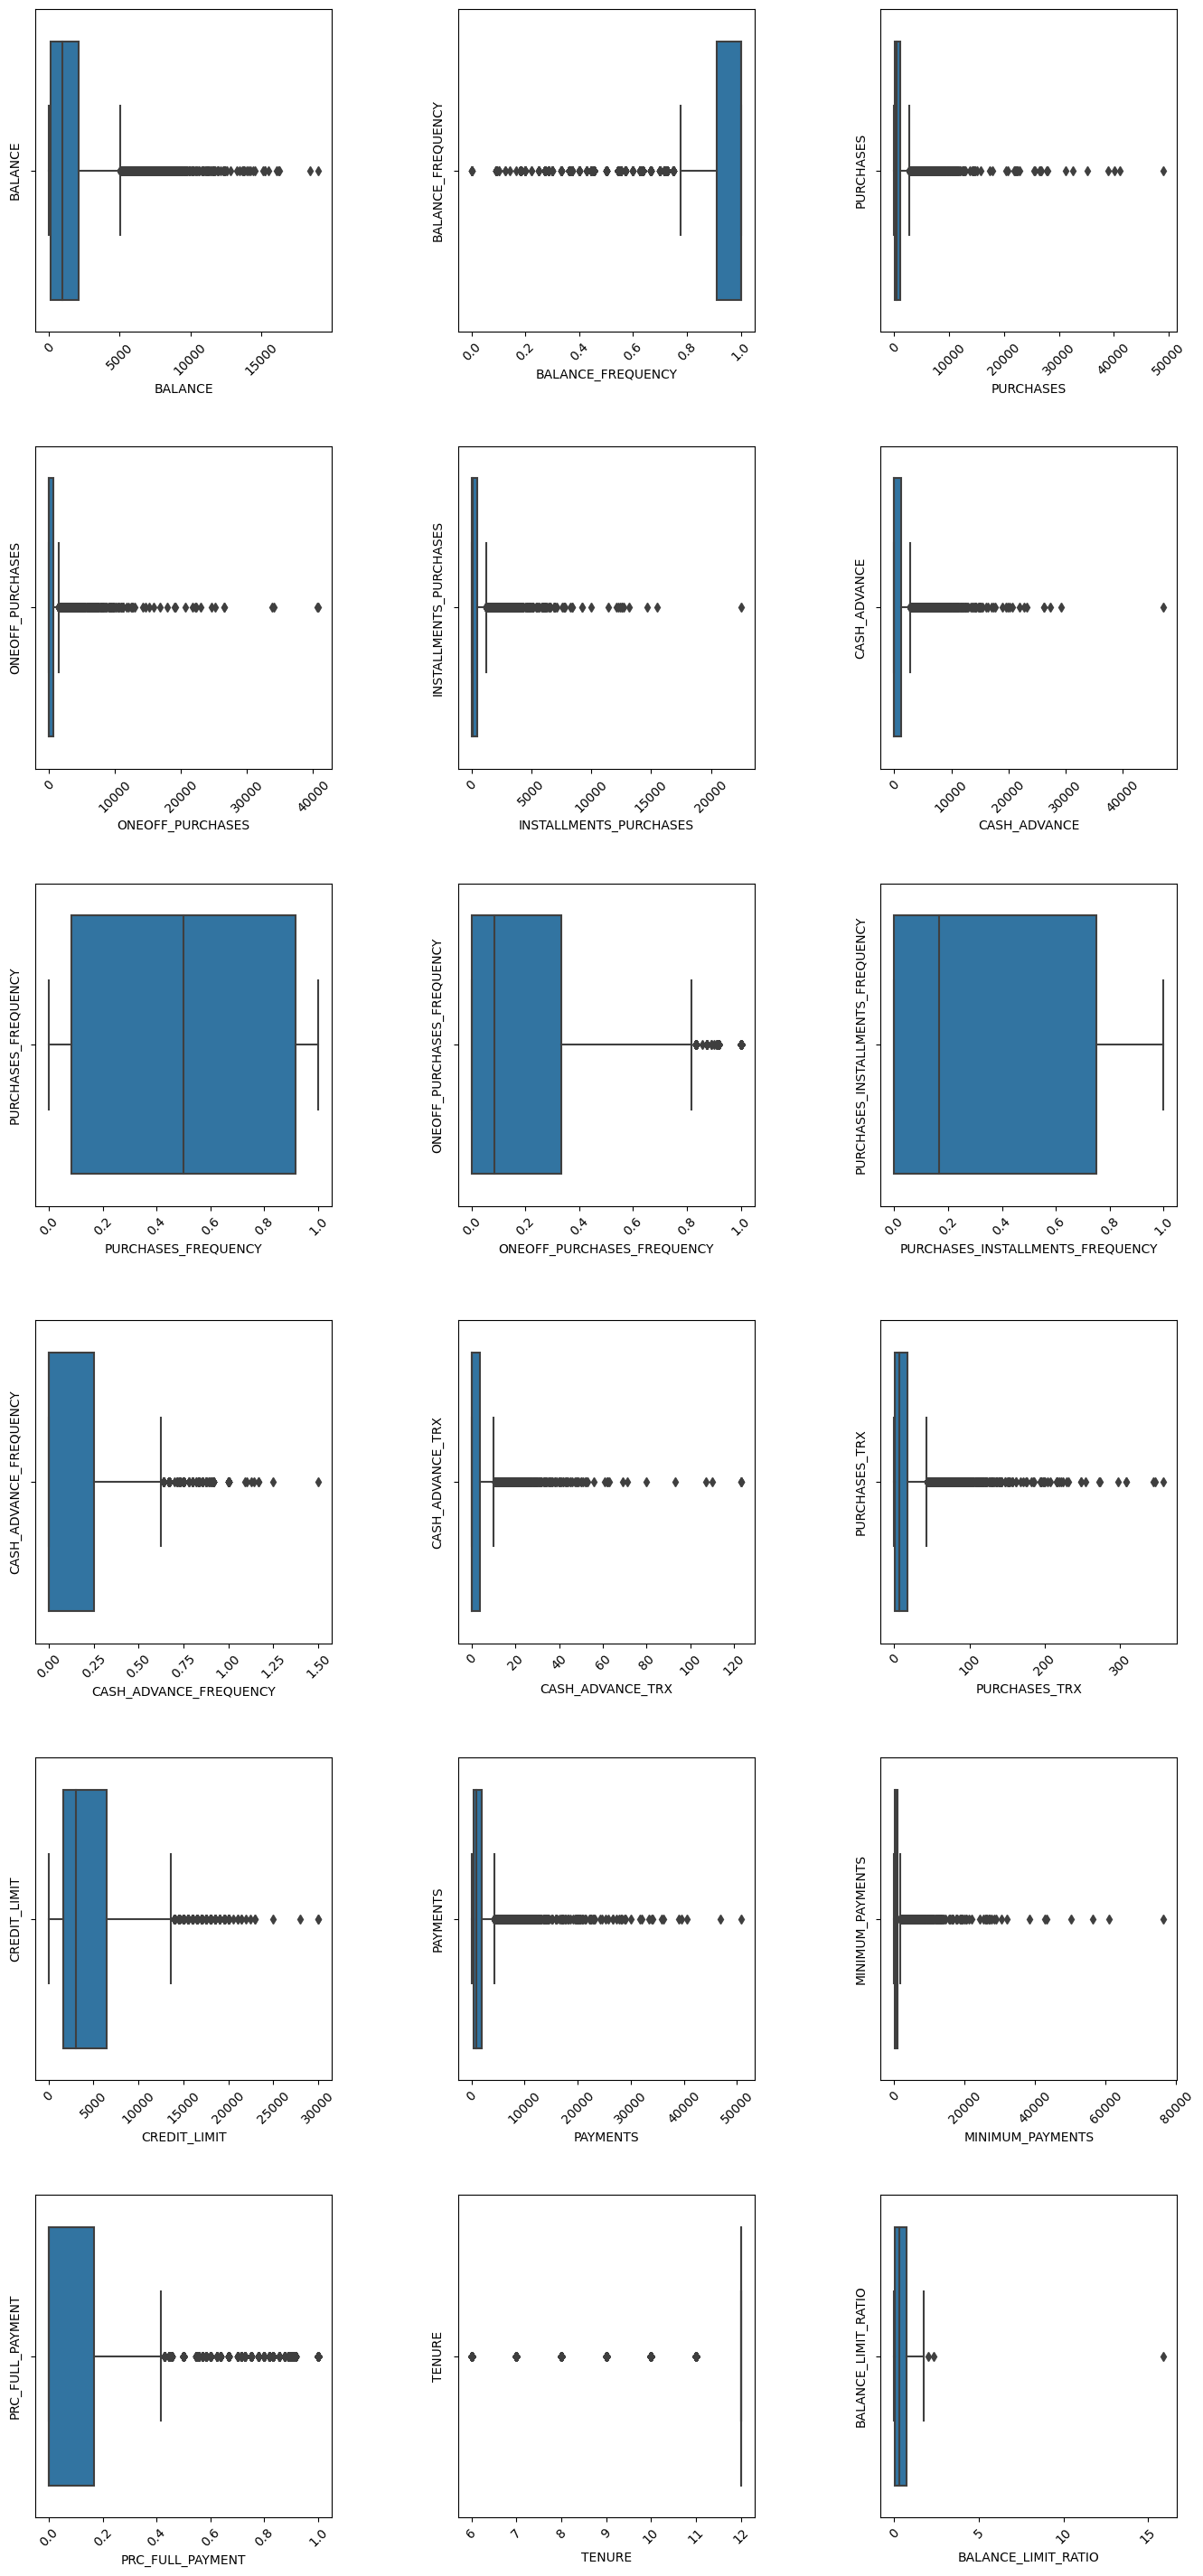

In [12]:
columns = df.columns.drop('CUST_ID')
num_rows = (len(columns)-1)//3+1
num_cols = 3


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=7.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)
    ax.tick_params(axis='x', rotation=45)
plt.show()

This dataset has a lot of outliers. Removing all of them would remove far too much of the data, but I will look to trim some of the more extreme outliers out to hopefully help the clustering models impacted by outliers perform better later on (such as K-Means). To keep this simple, I will do this process based on visually reviewing the boxplot information to determine a fair cut off point to remove some of these outliers without removing too much data. I will also leave any of the values considered "outliers" for features that are on a specific scale (from 0 to 1 for example), since these are preset scales so values within them should be considered normal values.

Additionally, scales like Cash Advance Frequency should not have values above 1, since the scale is 0 to 1, so I will have to remove those outliers above 1 as well.

In [13]:
df = df[df['CASH_ADVANCE_FREQUENCY'] <= 1]

In [14]:
df = df[df['BALANCE_LIMIT_RATIO'] < 2]

In [15]:
df = df[df['BALANCE'] < 12500]
df = df[df['CREDIT_LIMIT'] < 22500]
df = df[df['CASH_ADVANCE'] < 10000]
df = df[df['INSTALLMENTS_PURCHASES'] < 6000]
df = df[df['ONEOFF_PURCHASES'] < 12000]
df = df[df['MINIMUM_PAYMENTS'] < 10000]
df = df[df['PAYMENTS'] < 10000]
df = df[df['PURCHASES'] < 12000]
df = df[df['CASH_ADVANCE_TRX'] < 30]
df = df[df['PURCHASES_TRX'] < 300]

In [16]:
df.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count   8258.000000   8258.000000        8258.000000   8258.000000   
mean   14649.212400   1459.553657           0.893200    878.096123   
std     2626.313753   1870.633532           0.209195   1346.838097   
min    10001.000000      0.000000           0.000000      0.000000   
25%    12393.250000    133.825978           0.909091     45.650000   
50%    14653.500000    855.155841           1.000000    370.950000   
75%    16929.750000   1927.373398           1.000000   1100.797500   
max    19190.000000  12478.172860           1.000000  11994.710000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       8258.000000             8258.000000   8258.000000   
mean         508.052090              370.294048    811.503707   
std         1033.476405              640.716833   1507.519907   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           43.485000               94.140000      0.000000   
75%          568.610000              468.637500   1008.745942   
max        11994.710000             5991.490000   9972.234861   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          8258.000000                 8258.000000   
mean              0.496043                    0.202397   
std               0.399820                    0.296541   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.333333   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       8258.000000             8258.000000   
mean                           0.367481                0.127115   
std                            0.396671                0.185539   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.181818   
max                            1.000000                1.000000   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
count       8258.000000    8258.000000   8258.000000  8258.000000   
mean           2.741826      13.967183   4310.392781  1436.520615   
std            4.752868      21.334661   3407.713854  1601.875418   
min            0.000000       0.000000    150.000000     0.049513   
25%            0.000000       1.000000   1500.000000   409.056333   
50%            0.000000       7.000000   3000.000000   858.893876   
75%            4.000000      17.000000   6000.000000  1809.682317   
max           29.000000     274.000000  21500.000000  9960.882548   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  BALANCE_LIMIT_RATIO  
count       8258.000000       8258.000000  8258.000000          8258.000000  
mean         653.793899          0.159259    11.531121             0.387066  
std          959.936629          0.296818     1.317498             0.350024  
min            0.019163          0.000000     6.000000             0.000000  
25%          166.938458          0.000000    12.000000             0.043590  
50%          289.717150          0.000000    12.000000             0.303730  
75%          751.616395          0.166667    12.000000             0.718588  
max         9957.742740          1.000000    12.000000             1.322647

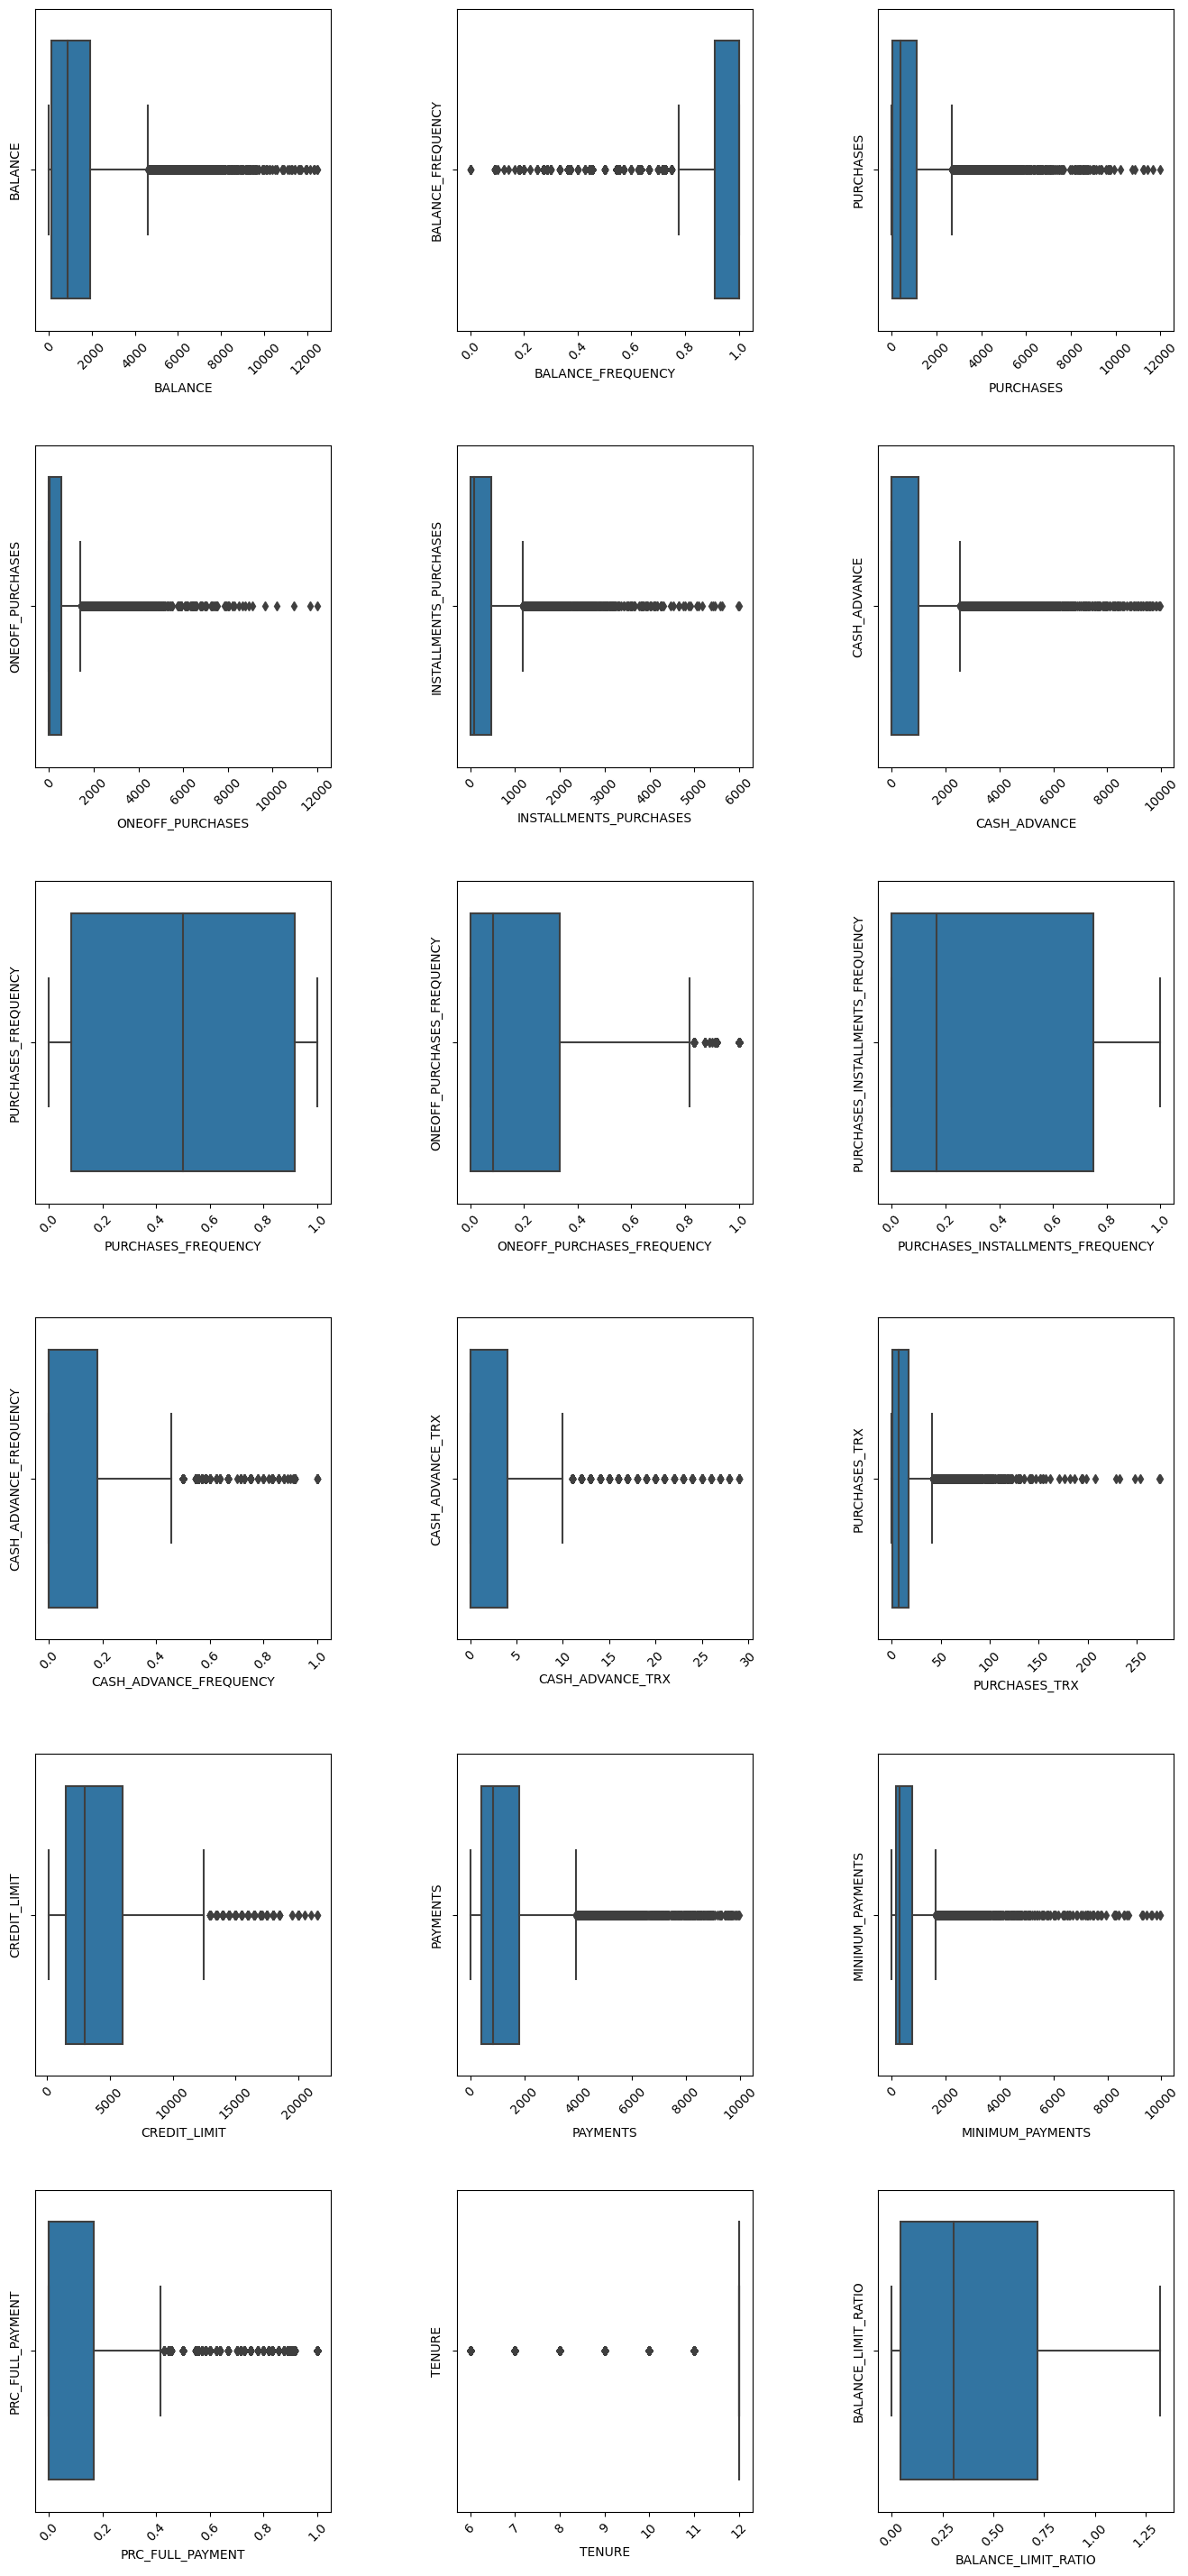

In [17]:
columns = df.columns.drop('CUST_ID')
num_rows = (len(columns)-1)//3+1
num_cols = 3


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=7.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)
    ax.tick_params(axis='x', rotation=45)
plt.show()

I removed some of the extreme outliers while only removing about 5% of data from the original dataset. I'm happy with this and will move on to scaling my data to ensure that the varying in feature value scales does not improperly impact the modelling afterwards:

In [18]:
df_scaled = df.copy()

In [19]:
scaler = StandardScaler()
df_scaled[df_scaled.columns.drop('CUST_ID')] = scaler.fit_transform(df_scaled[df_scaled.columns.drop('CUST_ID')])

In [20]:
df_scaled

CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       10001 -0.758427          -0.358624  -0.581171         -0.491625   
1       10002  0.931780           0.075968  -0.652008         -0.491625   
2       10003  0.553640           0.510561  -0.077910          0.256546   
4       10005 -0.343134           0.510561  -0.640128         -0.476142   
5       10006  0.187261           0.510561   0.337985         -0.491625   
...       ...       ...                ...        ...               ...   
8943    19184 -0.777154          -1.879699  -0.636489         -0.471401   
8945    19186 -0.765060           0.510561  -0.435844         -0.491625   
8947    19188 -0.767784          -0.286194  -0.544787         -0.491625   
8948    19189 -0.773098          -0.286194  -0.652008         -0.491625   
8949    19190 -0.581039          -1.082944   0.159757          0.566276   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.429067     -0.538336            -0.823862   
1                  -0.577972      3.735793            -1.240743   
2                  -0.577972     -0.538336             1.260537   
4                  -0.577972     -0.538336            -1.032304   
5                   1.503073     -0.538336             0.426778   
...                      ...           ...                  ...   
8943               -0.577972     -0.538336            -0.823862   
8945               -0.123579     -0.538336             1.260537   
8947               -0.352586     -0.538336             0.843656   
8948               -0.577972     -0.514084            -1.240743   
8949               -0.577972     -0.454060             0.426778   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.682569                         -0.716375   
1                      -0.682569                         -0.926468   
2                       2.689853                         -0.926468   
4                      -0.401535                         -0.926468   
5                      -0.682569                          0.544191   
...                          ...                               ...   
8943                   -0.120497                         -0.926468   
8945                   -0.682569                          1.174474   
8947                   -0.682569                          0.754287   
8948                   -0.682569                         -0.926468   
8949                    1.565714                         -0.926468   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.685155         -0.576913      -0.560961     -0.971500   
1                   0.662351          0.264735      -0.654711      0.789318   
2                  -0.685155         -0.576913      -0.092212      0.936053   
4                  -0.685155         -0.576913      -0.607836     -0.912806   
5                  -0.685155         -0.576913      -0.279711     -0.736724   
...                      ...               ...            ...           ...   
8943               -0.685155         -0.576913      -0.607836     -1.118235   
8945               -0.685155         -0.576913      -0.373461     -0.971500   
8947               -0.685155         -0.576913      -0.420336     -0.971500   
8948                0.213184         -0.156089      -0.654711     -1.118235   
8949                1.111518         -0.156089       0.423413     -0.912806   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  \
0    -0.770842         -0.535780         -0.536585  0.355907   
1     1.664720          0.436041          0.212141  0.355907   
2    -0.508468         -0.027617         -0.536585  0.355907   
4    -0.473340         -0.426098         -0.536585  0.355907   
5    -0.022764          1.826744         -0.536585  0.355907   
...        ...               ...               ...       ...   
8943 -0.860216         -0.635831         -0.536585 -4.198456  

**2. Exploratory Data Analysis (EDA) [5 marks]:**

Perform an EDA to understand the data and identify patterns that could inform the clustering.
Explain your findings.

I'm going to create some scatterplots comparing some key features with other features in the dataset to see if I find any interesting distributions or relationships that could help me understand general customer behavior and help determine what features to include in the clustering.

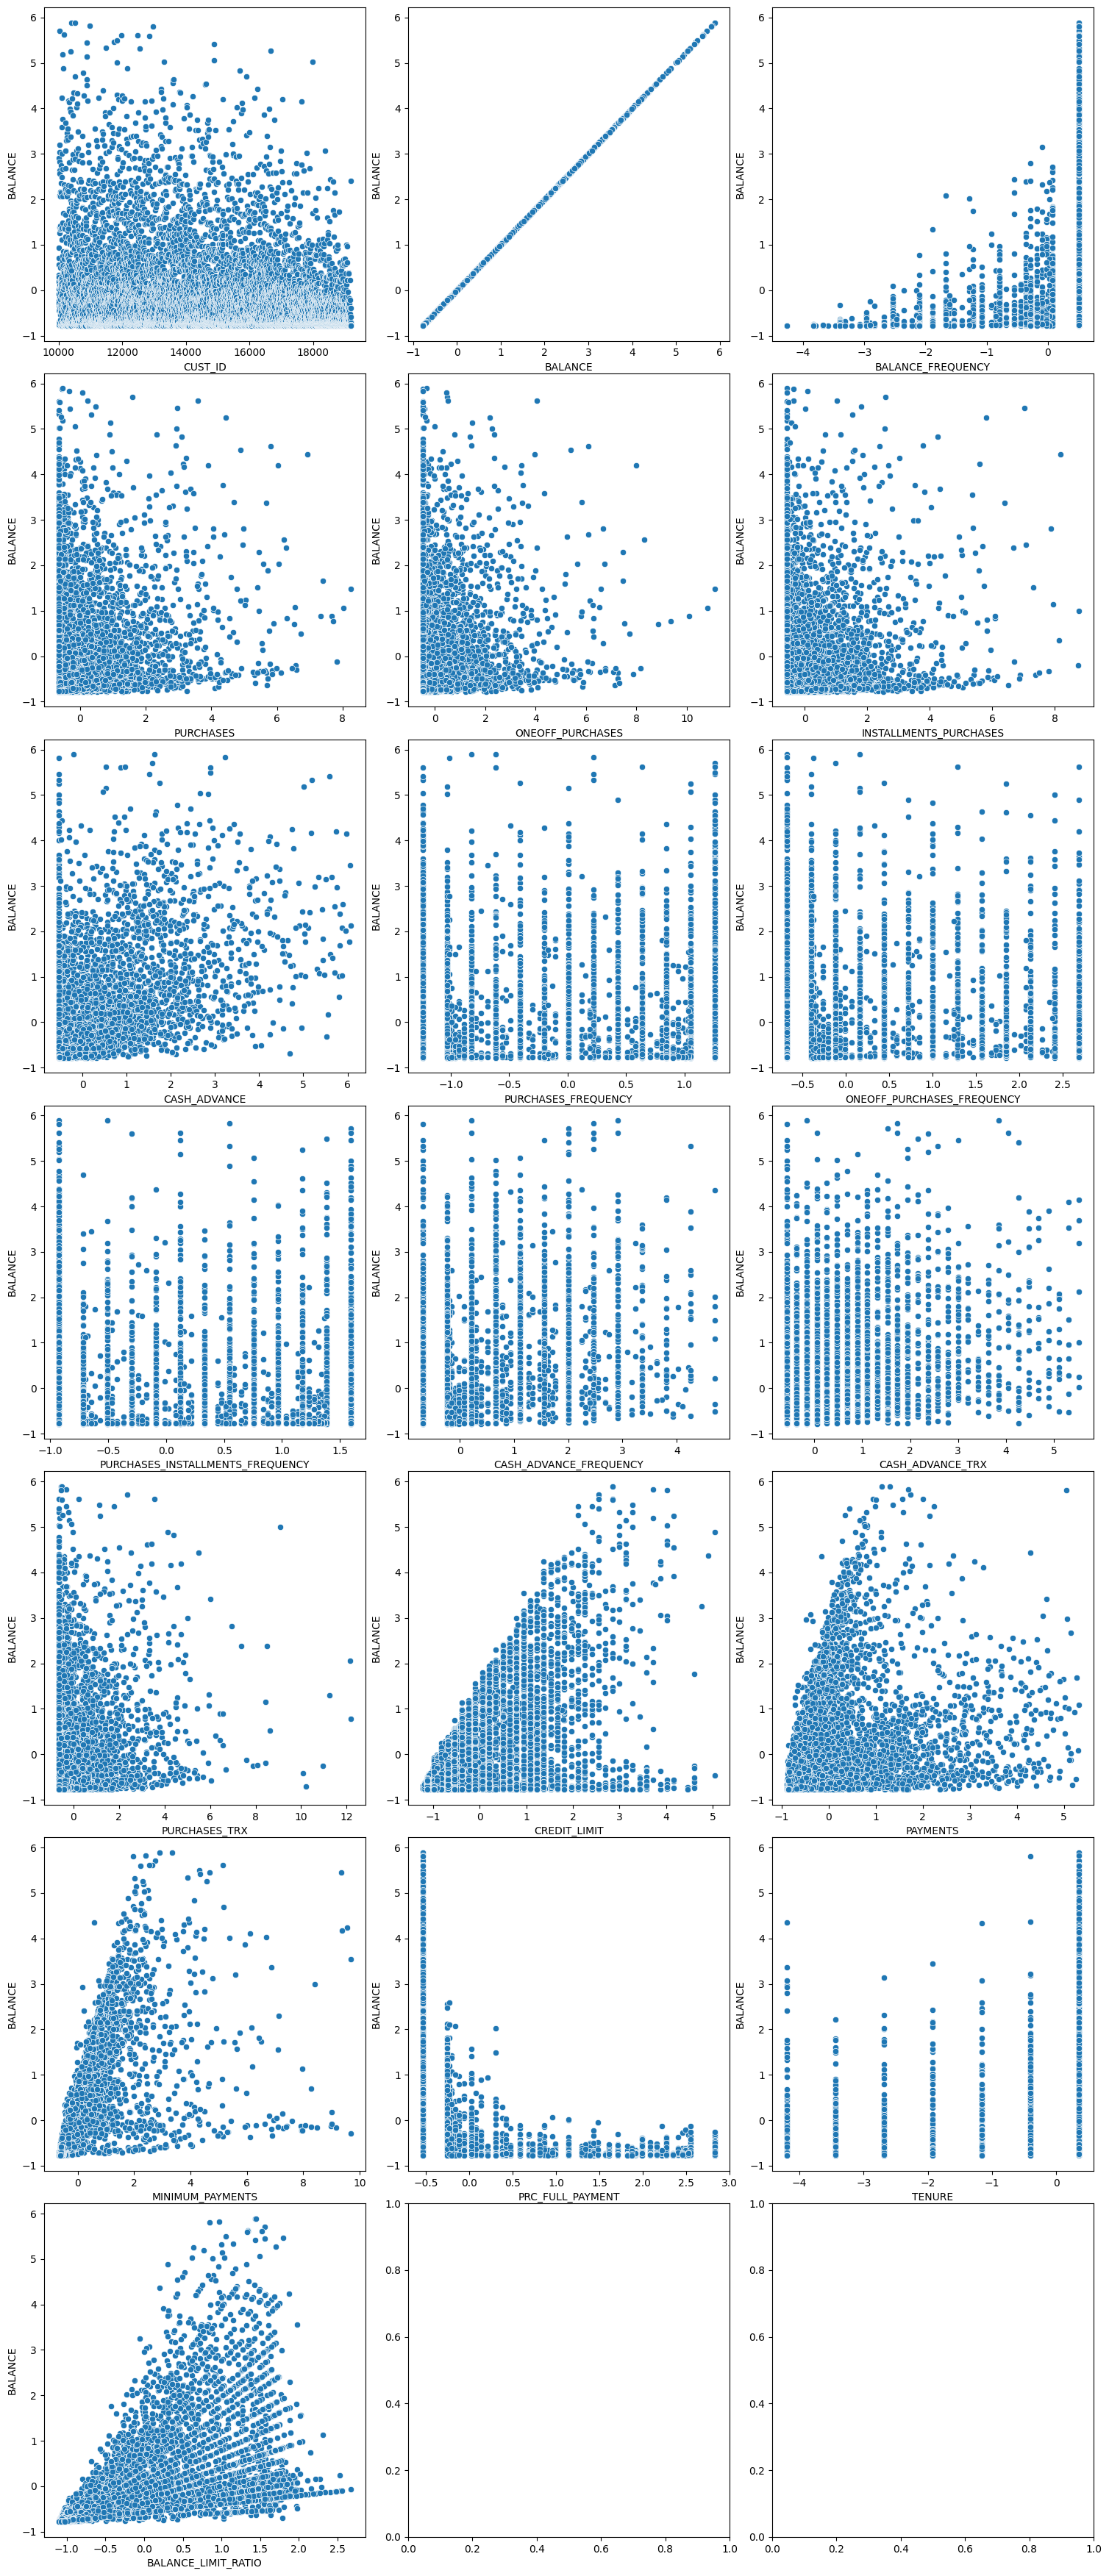

In [21]:
columns = df_scaled.columns
y_column = 'BALANCE'

num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.scatterplot(x=column, y=y_column, data=df_scaled, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(y_column)

plt.show()

Some general takeaways from comparing Balance to other features, as balance levels are higher, credit limit increases, one off and installment purchases tend to be lower, minimum payment increases, and amount of non-payments decrease. These could be features I include in the clustering.

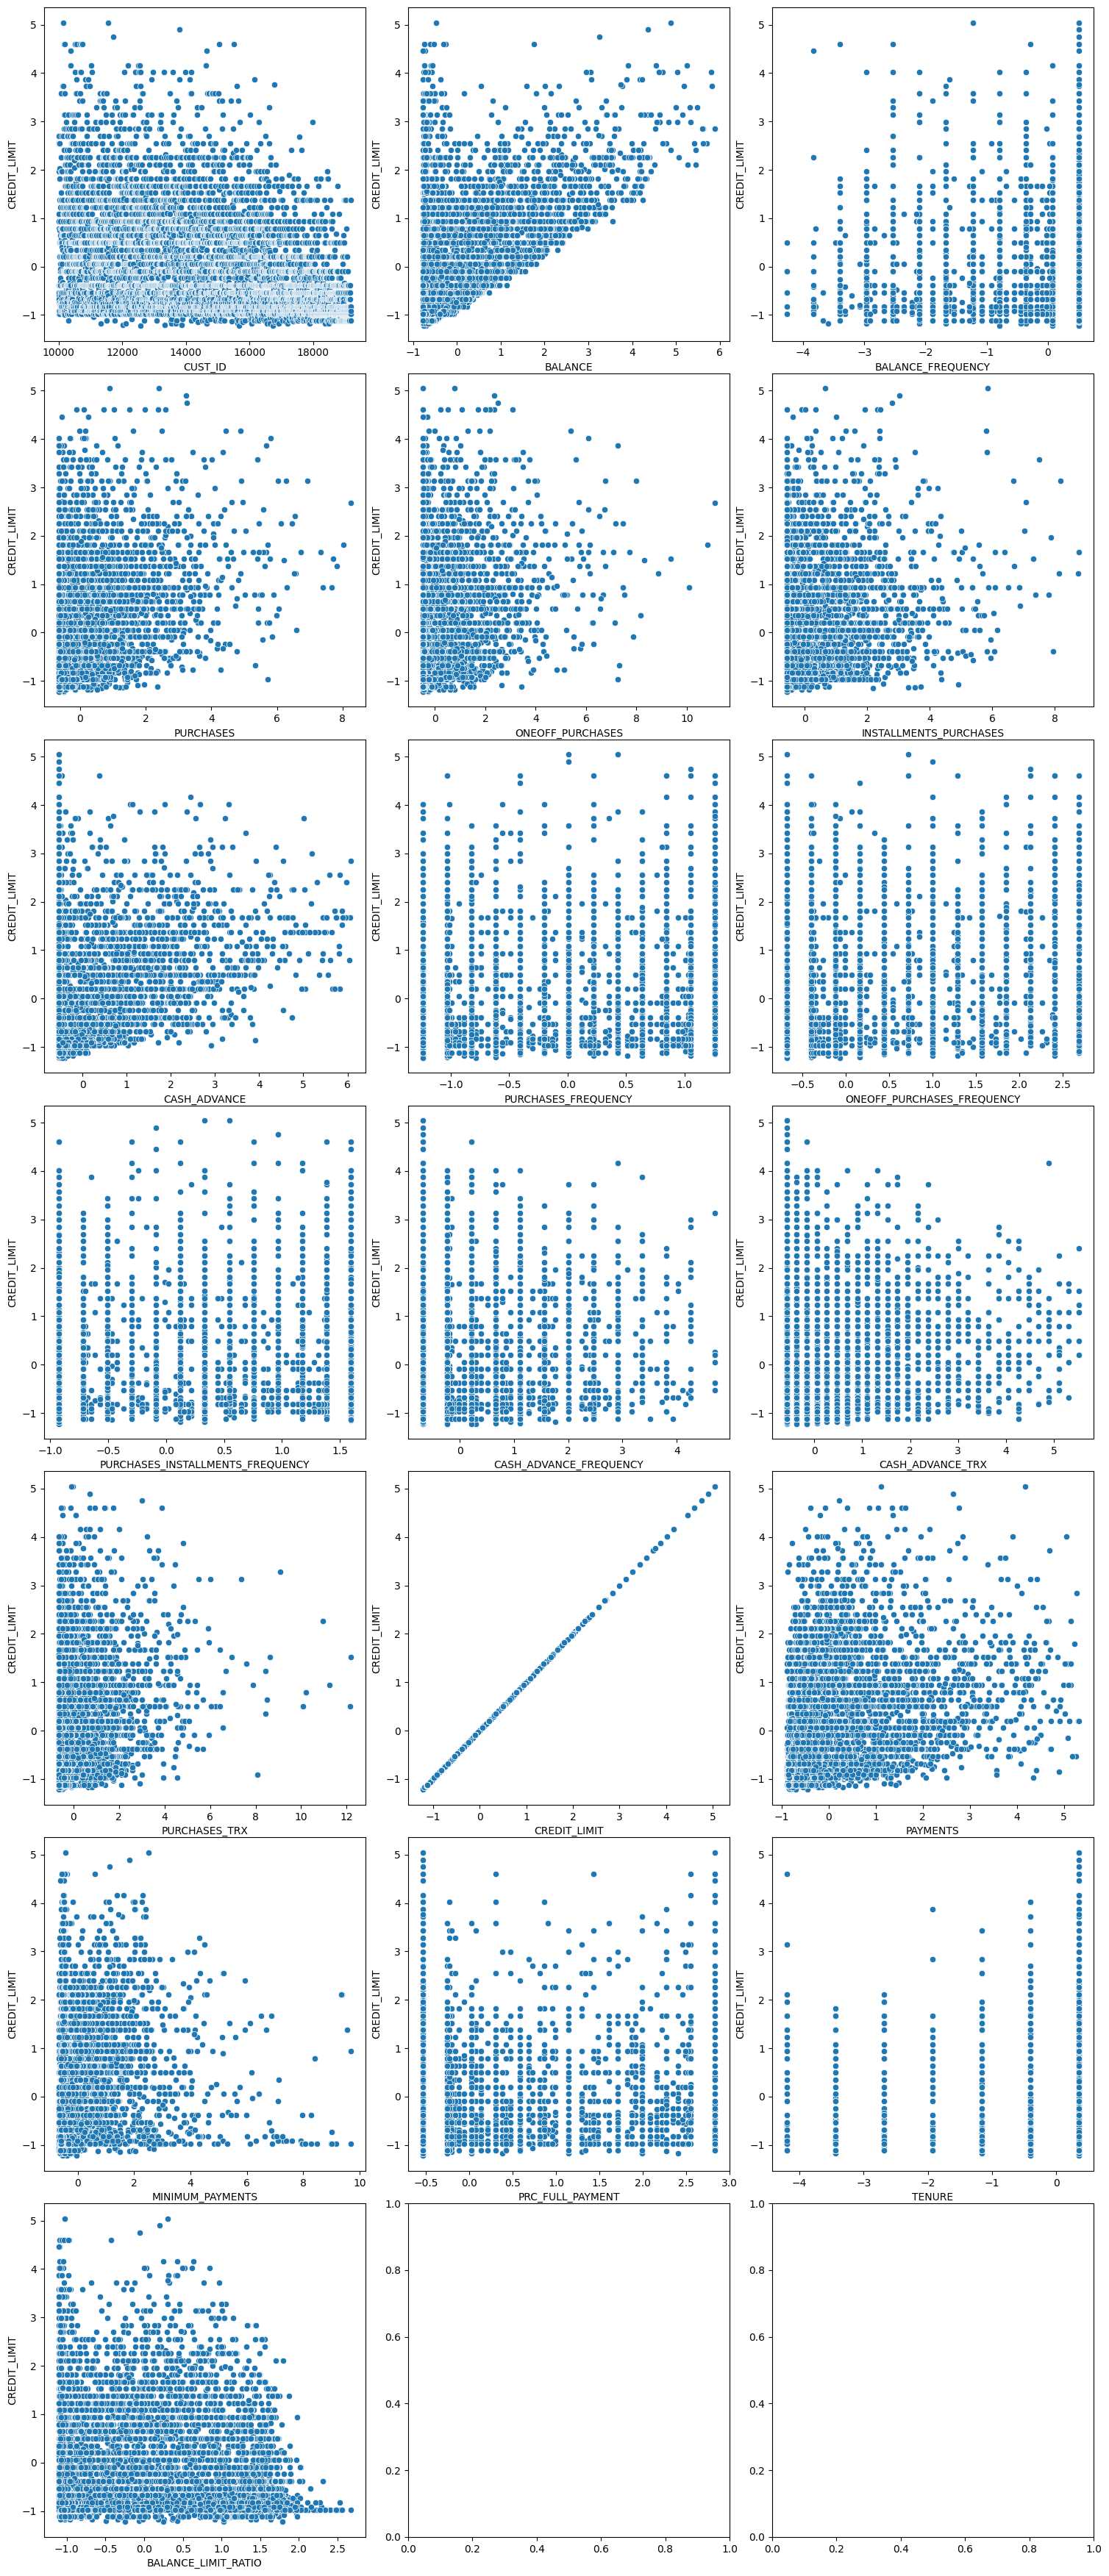

In [22]:
columns = df_scaled.columns
y_column = 'CREDIT_LIMIT'

num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.scatterplot(x=column, y=y_column, data=df_scaled, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(y_column)

plt.show()

One key takeaway I see here is that purchase transactions made tend to be highest with people who have lower to middle credit levels, and actually decreases at higher credit levels. Could signify that people with higher credit limits have more responsible spending habits, or purchase higher priced goods less often, or spend less on credit and more using other financial options.

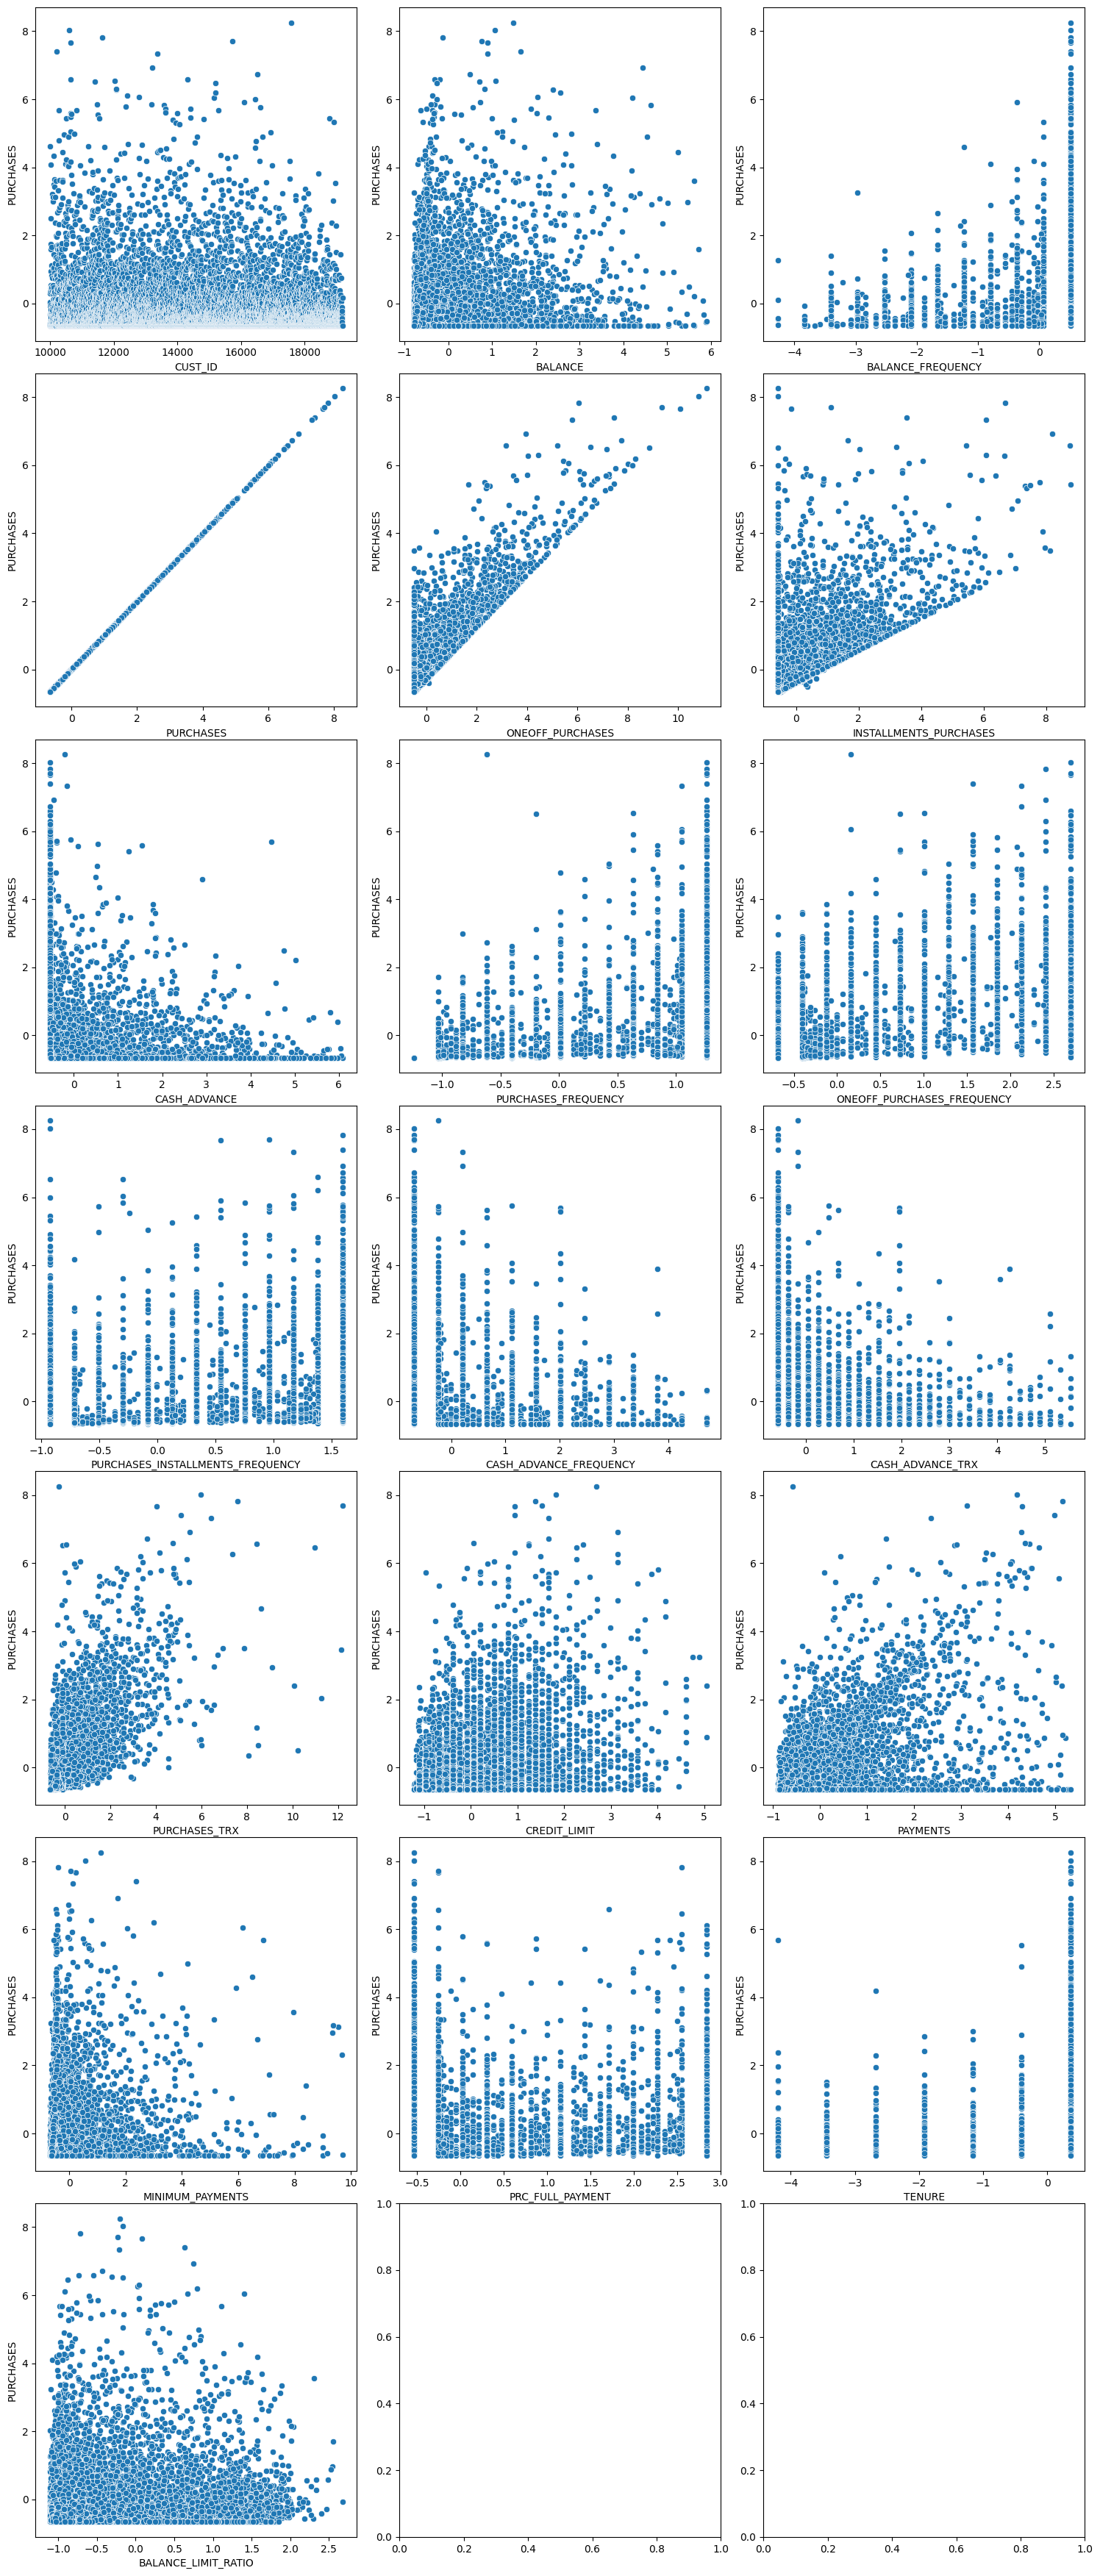

In [23]:
columns = df_scaled.columns
y_column = 'PURCHASES'

num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.scatterplot(x=column, y=y_column, data=df_scaled, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(y_column)

plt.show()

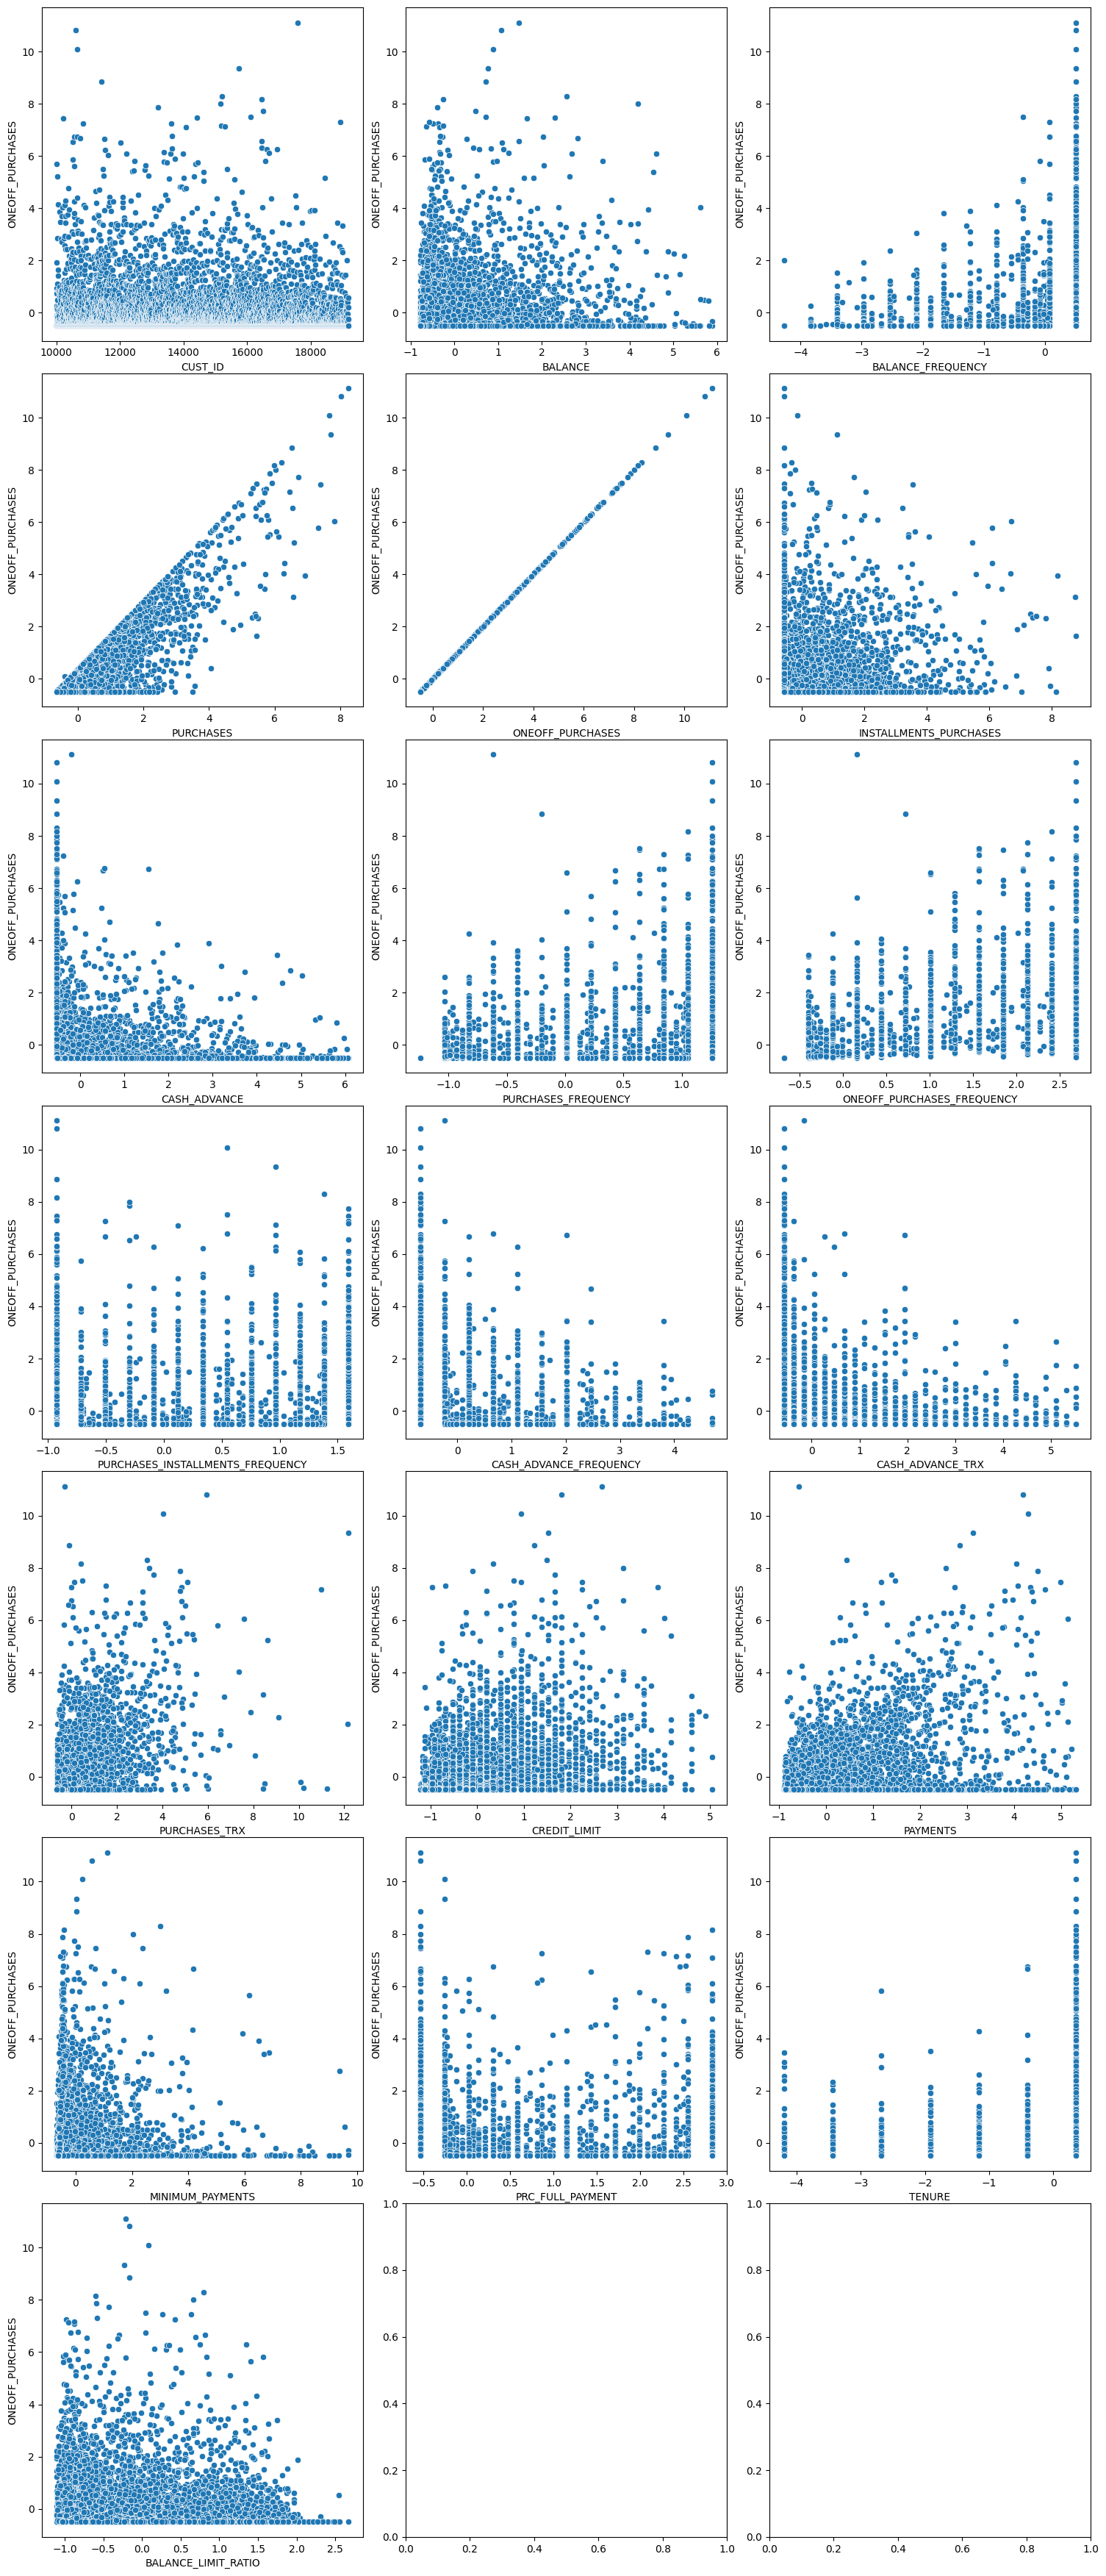

In [24]:
columns = df_scaled.columns
y_column = 'ONEOFF_PURCHASES'

num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.scatterplot(x=column, y=y_column, data=df_scaled, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(y_column)

plt.show()

Key take away when reviewing the relationship with oneoff purchases is that people who make more oneoff purchases tend to have smaller minimum payments, and those with higher minimum payments tend to have fewer oneoff purchases. Could signify that those with less oneoff purchases buy more expensive things, and thus their minimum payments are also higher to account for that. It could also signify that those who make higher minimum payments may have more responsible spending habits, paying their credit off in higher amounts and using credit less often.

I played around with various feature options to determine which features would provide a data distribution that would help make meaningful clusters. Through trial and error, I've decided on the following features. Using all features resulted in a very congested data distribution, so removing features helped make more descernable clusters.

In [25]:
features = ['BALANCE', 'CREDIT_LIMIT','PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']

To work with the multiple features in a 2d space, I will perform PCA to plot the data on an x and y axis, and then conduct the clustering. My thought process here is that utilizing PCA will help understand how my selected features distribute in 2 dimensions to understand what features to include to best create a distribution that has more meaningful separation between customers. Since using all the features led to an extremely dense pocket of data without any meaningful clustering results, I've decided to limit the feature number, and find a better mix of features. Since the labels generated by the clusters will still be able to be applied to each individual row of data, each customer can still be analyzed after the fact, and their behavior will not be lost. My goal here is to make the most effective clustering possible, amd then I will analyze how each cluster behaves by aplying the clustering labels to the original dataset.

In [26]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled[features])

df_PCA = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

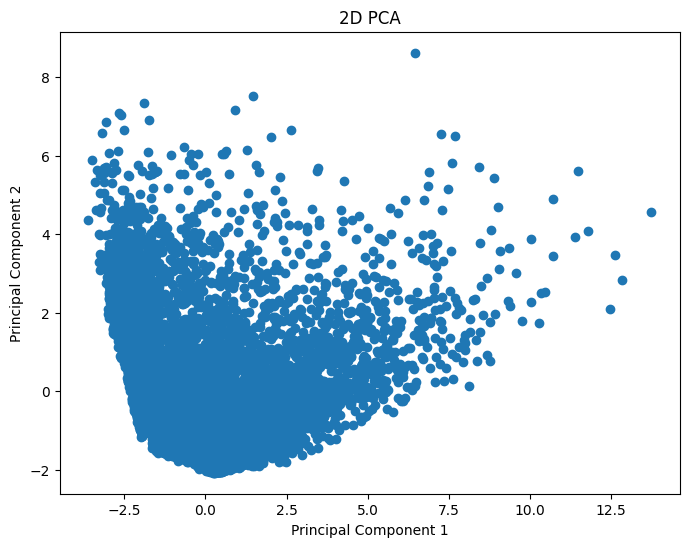

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(df_PCA['principal component 1'], df_PCA['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA')
plt.show()

**3. Clustering Algorithms [10 marks]:**

Implement at least three different clustering algorithms of your choice (e.g., K-Means, Hierarchical, DBSCAN). You can try any algorithms available in sklearn.
Use Elbow method, Silhouette analysis, or other techniques to determine the optimal number of clusters.
Discuss each method, and select the most appropriate

The distribution of the data is a little tricky when it comes to having a clear idea of which clustering method would work best. There aren't any distinct clusters when looking at it visually, and the density of the data is high in one area, and then gets more dispersed on the outer edges. I'm thinking K-Means, Affinity Propogation and Mean-Shift may be good options for clustering this type of data distribution. Considering the many outliers, I want to also try DBSCAN for it's outlier handling capabilities. I'll also try Agglomerative Clustering for it's ability to pinpoint many clusters, just in case there are potentially a large number of clusters within the dense data that I can't fully see.

I'm going to start with K-Means clustering. I'll run the elbow method and Silhouette score to try and find the optimal number of clusters and then see how it performs. 

In [28]:
X = df_PCA

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

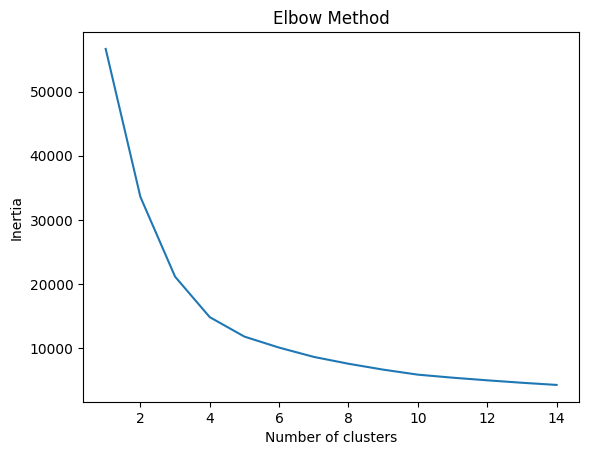

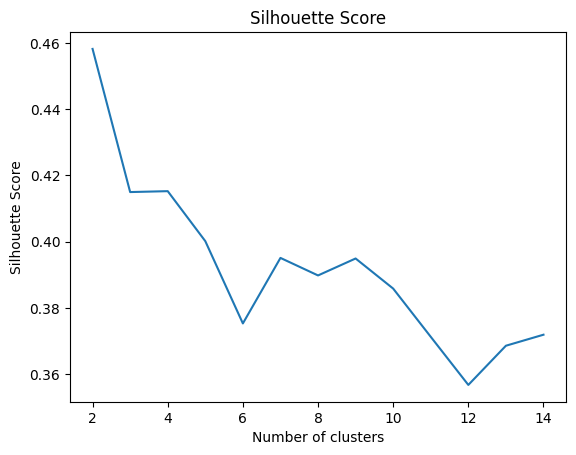

In [29]:
inertia = []
silhouette_avg = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(X, labels)]

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 15), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Based on the silhouette and elbow method results, I feel as though 4 clusters makes the most sense. This is where the Inertia decrease levels off significantly, and the moment before the silhouette score takes a significant dive. Trial and error also made this value seem like it made the most sense at providing a useful number of customer clusters.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans Silhouette Score: 0.41523075174586105


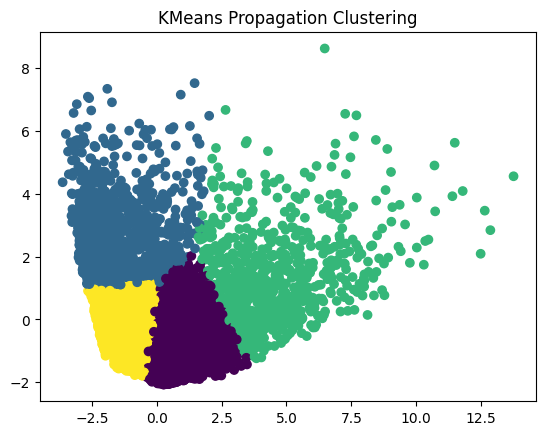

In [30]:
k = 4

kmeans = KMeans(n_clusters = k, random_state = 0)
kmeans.fit(X)
km_labels = kmeans.fit_predict(X)
km_sil_score = silhouette_score(X, km_labels)
print(f"KMeans Silhouette Score: {km_sil_score}")

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=km_labels)
plt.title('KMeans Propagation Clustering')
plt.show()

Affinity Propagation Silhouette Score: 0.3394870065779363


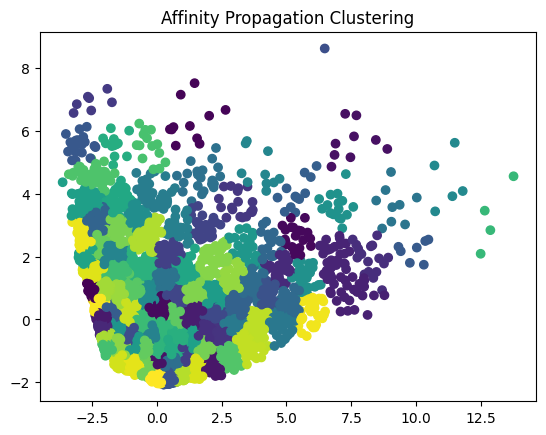

In [31]:
af = AffinityPropagation(damping=0.8, random_state=0)
af_labels = af.fit_predict(X)

af_sil_score = silhouette_score(X, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=af_labels)
plt.title('Affinity Propagation Clustering')
plt.show()

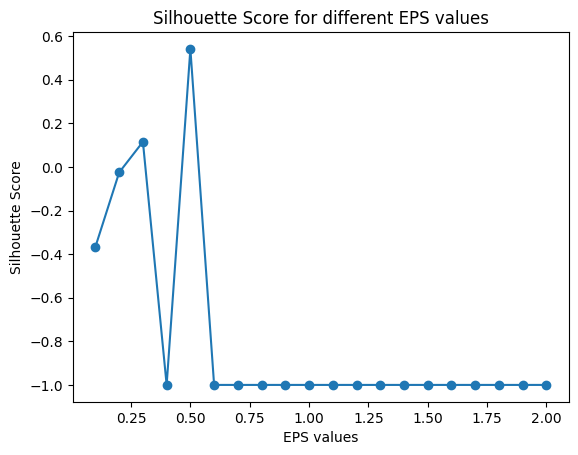

In [32]:
eps_values = np.linspace(0.1, 2, 20)
sil_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=15)
    dbscan_labels = dbscan.fit_predict(X)
    
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    
    if n_clusters > 1:
        dbscan_sil_score = silhouette_score(X, dbscan_labels)
        sil_scores.append(dbscan_sil_score)
    else:
        sil_scores.append(-1)

plt.plot(eps_values, sil_scores, marker='o')
plt.xlabel('EPS values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different EPS values')
plt.show()

best_eps = eps_values[np.argmax(sil_scores)]

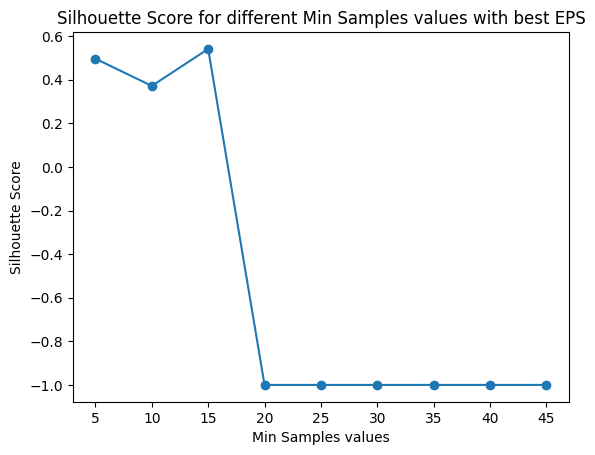

In [33]:
min_samples_values = range(5, 50, 5)
sil_scores = []

for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X)
    
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    
    if n_clusters > 1:
        dbscan_sil_score = silhouette_score(X, dbscan_labels)
        sil_scores.append(dbscan_sil_score)
    else:
        sil_scores.append(-1)

plt.plot(min_samples_values, sil_scores, marker='o')
plt.xlabel('Min Samples values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different Min Samples values with best EPS')
plt.show()

Based on the values found above, the optimal DBSCAN paramaeters are eps of 0.5, and a minimum sample size of 15. I will use this in the clustering model.

DBSCAN Silhouette Score: 0.5415949834267444


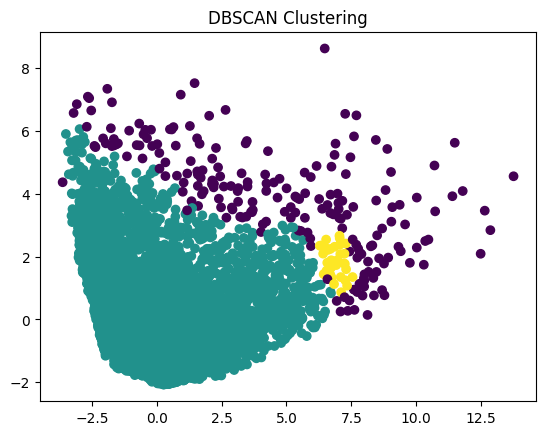

In [34]:
dbscan = DBSCAN(eps=0.5, min_samples=15)
dbscan_labels = dbscan.fit_predict(X)

if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

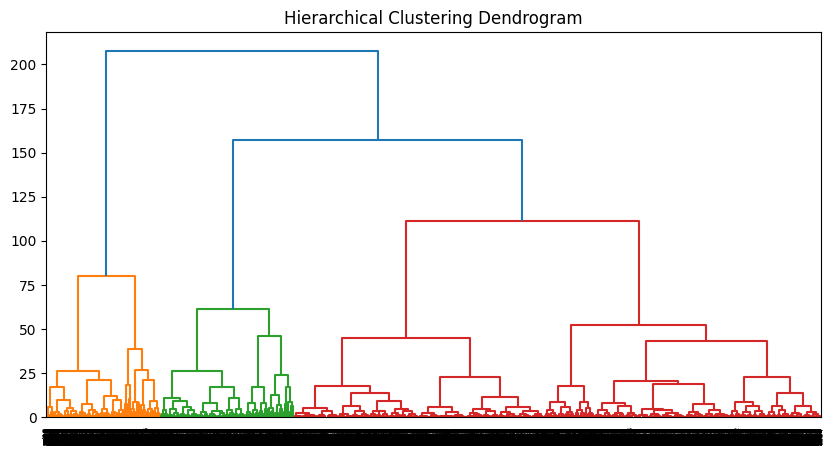

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

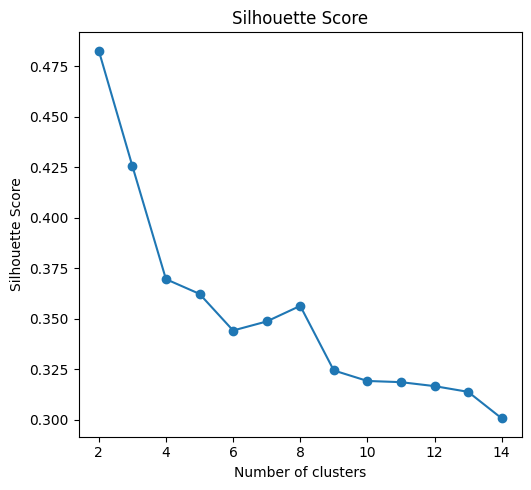

In [36]:
silhouette_avg = []
range_n_clusters = range(2, 15)
for n_clusters in range_n_clusters:
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    ac_labels = hierarchical.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, ac_labels))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


Based on thedse scores, 4 seems to be the best amount. 8 clusters seems like it would be too many to generate meaningful insights due to smaller cluster sizes and less differentiation between customer behavior between clusters.

0.3697117549801264


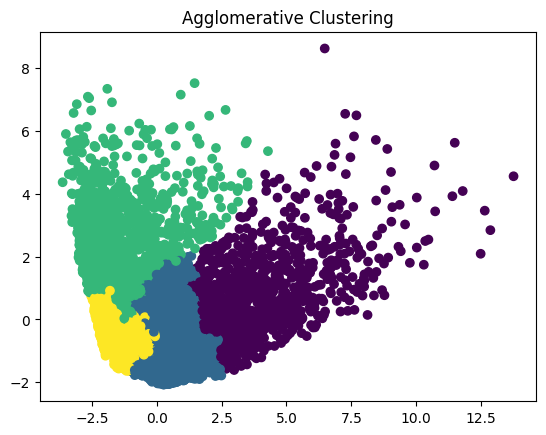

In [37]:
k = 4

hierarchical = AgglomerativeClustering(n_clusters=k)
ac_labels = hierarchical.fit_predict(X)
silhouette_avg = silhouette_score(X, ac_labels)
print(silhouette_avg)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=ac_labels)
plt.title('Agglomerative Clustering')
plt.show()

0.5074194688806805


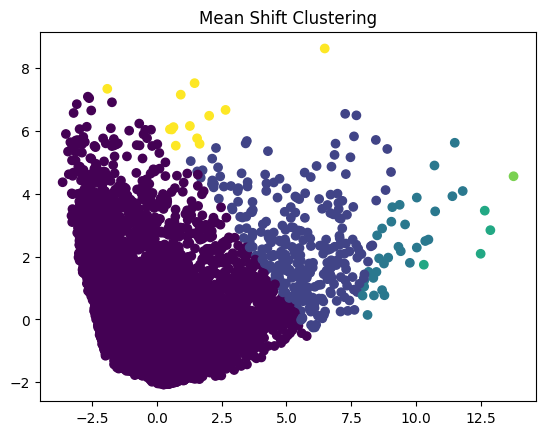

In [38]:
mean_shift = MeanShift(bandwidth=1.5)
ms_labels = mean_shift.fit_predict(X)
silhouette_avg = silhouette_score(X, ms_labels)

print(silhouette_avg)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=ms_labels)
plt.title('Mean Shift Clustering')
plt.show()

Based on these silhouette score and visual plot results, KMeans and Mean Shift seem the most promising. The silhouette scores are amongst the highest while delivering a good number of customer clusters that should help gain some insights into customer behavior as well as better customer segmentation groups. I will apply the labels to the original dataframe to allow me to view how the various feature data is distributed amongst the different cluster labels. I'm hoping to determine which clustering model has grouped the customers in the most clear way from a business perspective.

In [39]:
df['KMEANS_CLUSTER'] = km_labels
df['MEAN_SHIFT_CLUSTER'] = ms_labels
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    10001    40.900749           0.818182      95.40              0.00   
1    10002  3202.467416           0.909091       0.00              0.00   
2    10003  2495.148862           1.000000     773.17            773.17   
4    10005   817.714335           1.000000      16.00             16.00   
5    10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0                    0.000000                          0.083333  ...   
1                    0.000000                          0.000000  ...   
2                    1.000000                          0.000000  ...   
4                    0.083333                          0.000000  ...   
5                    0.000000                          0.583333  ...   

   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                 0              2        1000.0   201.802084   
1                 4              0        7000.0  4103.032597   
2                 0             12        7500.0   622.066742   
4                 0              1        1200.0   678.334763   
5                 0              8        1800.0  1400.057770   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  BALANCE_LIMIT_RATIO  \
0        139.509787          0.000000      12             0.040901   
1       1072.340217          0.222222      12             0.457495   
2        627.284787          0.000000      12             0.332687   
4        244.791237          0.000000      12             0.681429   
5       2407.246035          0.000000      12             1.005460   

   KMEANS_CLUSTER  MEAN_SHIFT_CLUSTER  
0               3                   0  
1               1                   0  
2               0                   0  
4               3                   0  
5               0                   0  

[5 rows x 21 columns]

I will run box plots based on the labels. Here, I would like to see distribution of values that don't overlap much between clusters and don't have too many outliers within them. The less overlap and the less amount of outliers will demonstarte to me that the customers within different clusters do have different behaviors and are more concistently likely to act within that behavior range.

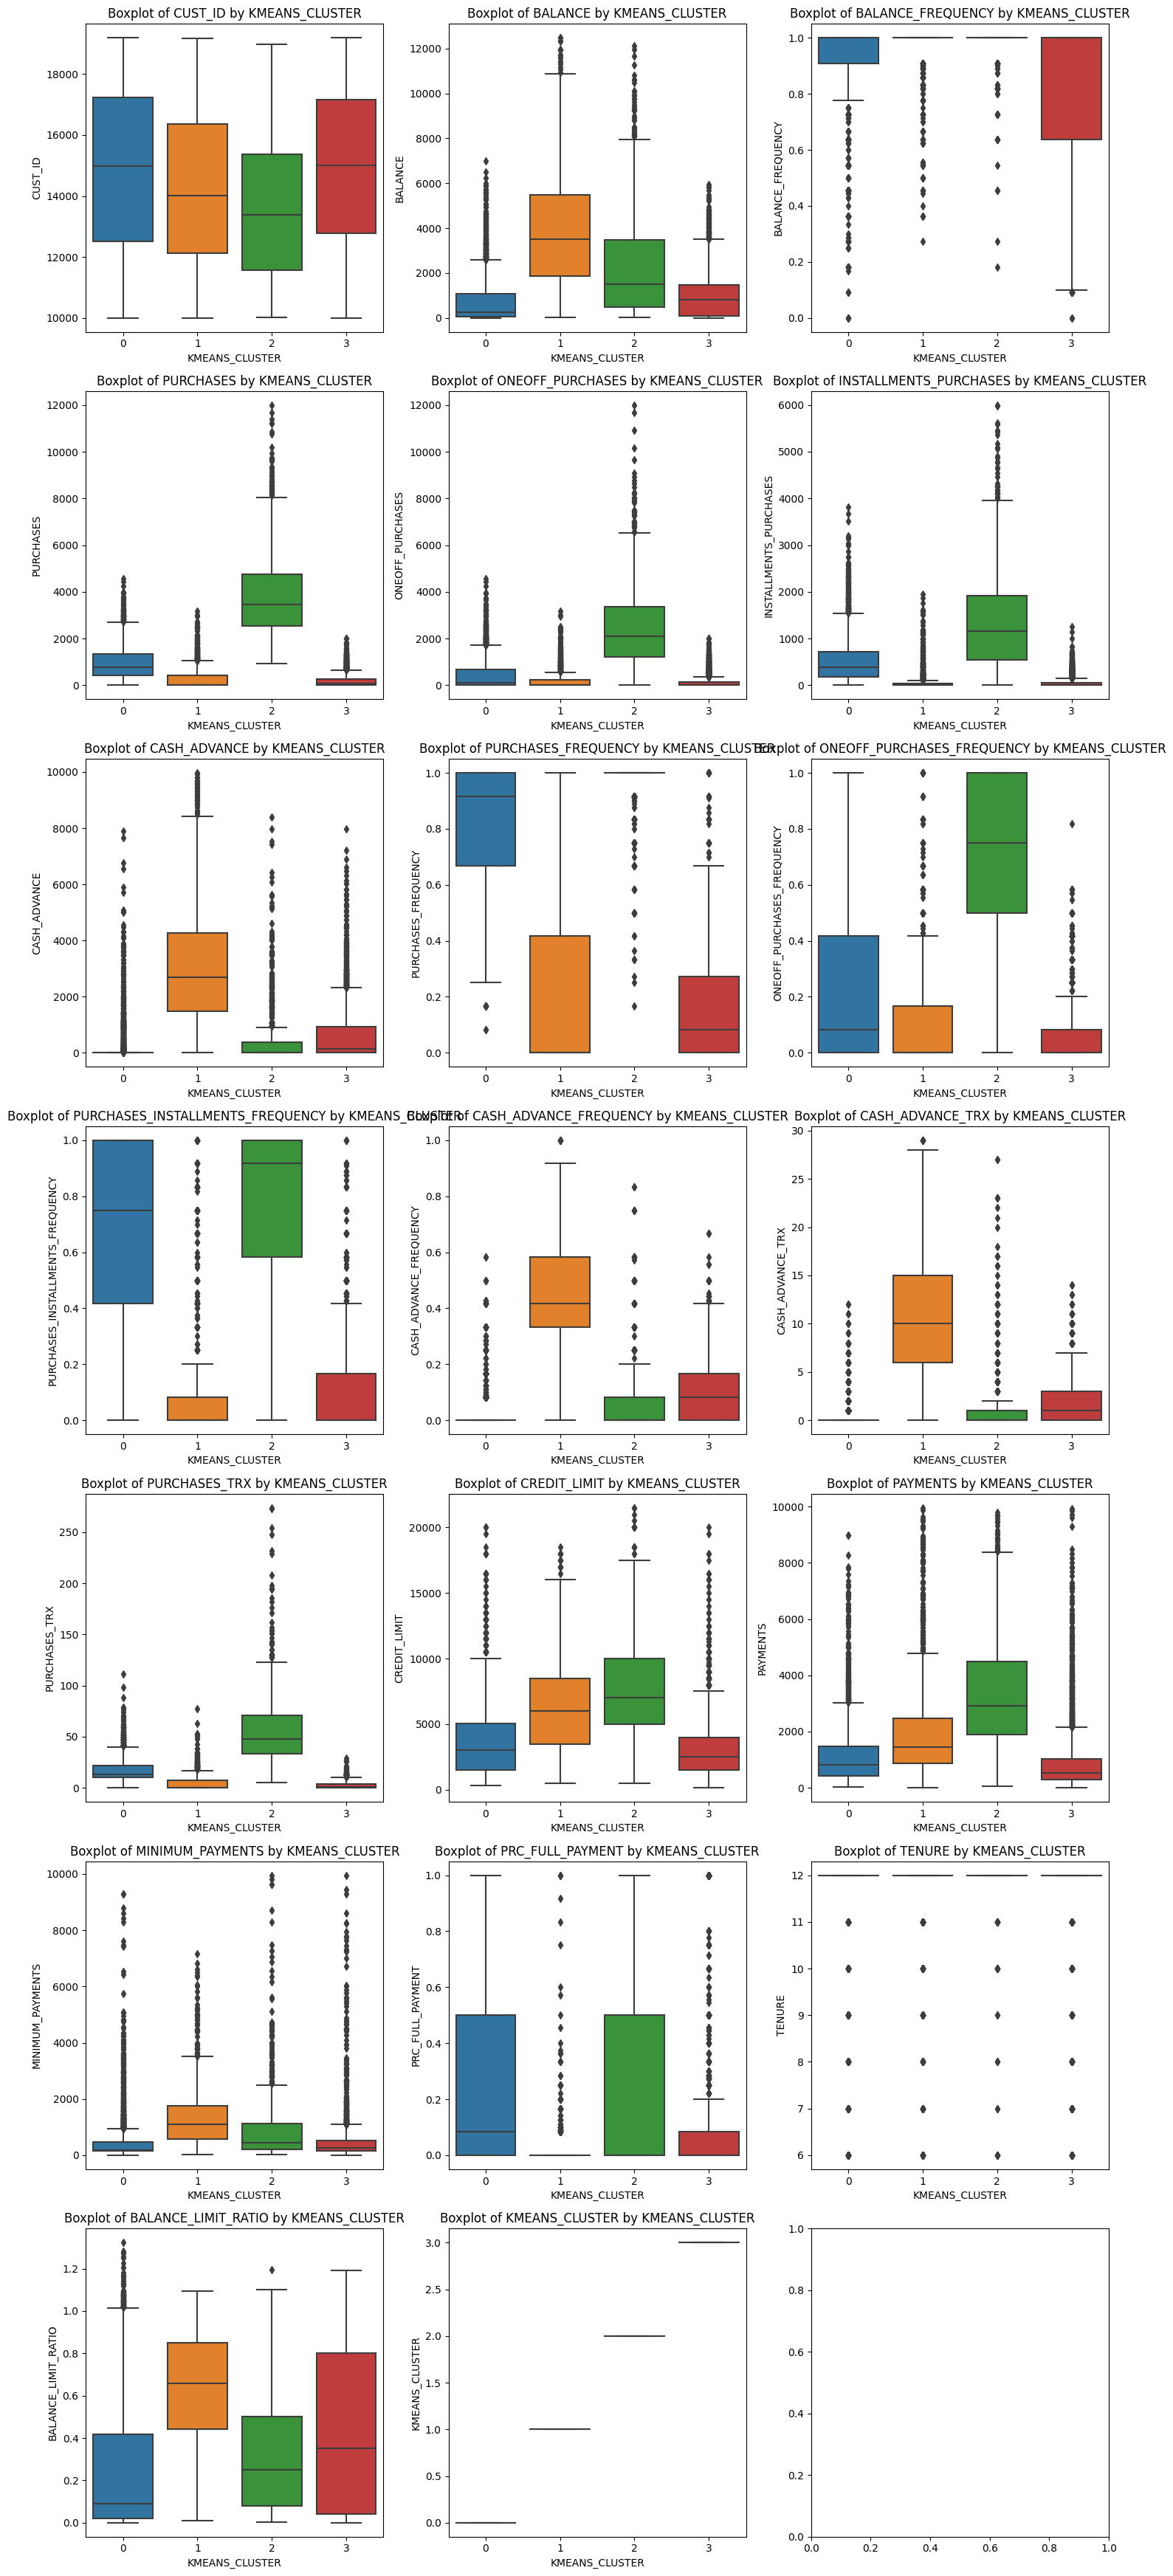

In [40]:
feature = df.columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(df.columns[:-1]):
    ax = axes.flatten()[i]
    sns.boxplot(x='KMEANS_CLUSTER', y=feature, data=df, ax=ax)
    ax.set_title(f'Boxplot of {feature} by KMEANS_CLUSTER')

plt.tight_layout()
plt.show()

I also want to view the average behavior of each cluster. This will give a more straighforward and simple view of how customers in each cluster behave as a whole.

In [41]:
df_km = df.groupby('KMEANS_CLUSTER').mean()
df_km.reset_index(inplace=True)
df_km

KMEANS_CLUSTER       CUST_ID      BALANCE  BALANCE_FREQUENCY    PURCHASES  \
0               0  14851.716639   725.545909           0.921233   967.127066   
1               1  14227.964725  3907.131791           0.969312   313.308236   
2               2  13573.285878  2342.355836           0.984065  3889.813525   
3               3  14914.850611   968.214668           0.813236   189.215296   

   ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0        442.030185              525.490424    176.241315   
1        219.051419               94.340221   3091.949691   
2       2507.613421             1382.200103    528.122902   
3        134.450169               55.013223    610.083927   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  ...  \
0             0.829766                    0.241826  ...   
1             0.221816                    0.115922  ...   
2             0.951951                    0.685744  ...   
3             0.165433                    0.066825  ...   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.030375          0.545546      17.429580   3806.124455   
1                0.447746         11.011485       4.760459   6425.430681   
2                0.077984          1.743972      56.940299   7726.750861   
3                0.108245          1.903226       2.533667   3040.840380   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  \
0  1138.458809        478.515143          0.259055  11.550252   
1  2064.003835       1329.572349          0.023347  11.383101   
2  3434.431436        935.077082          0.262720  11.894374   
3   929.677991        482.382286          0.089941  11.470717   

   BALANCE_LIMIT_RATIO  MEAN_SHIFT_CLUSTER  
0             0.270011            0.000000  
1             0.634618            0.048400  
2             0.323383            0.447761  
3             0.418993            0.000000  

[4 rows x 21 columns]

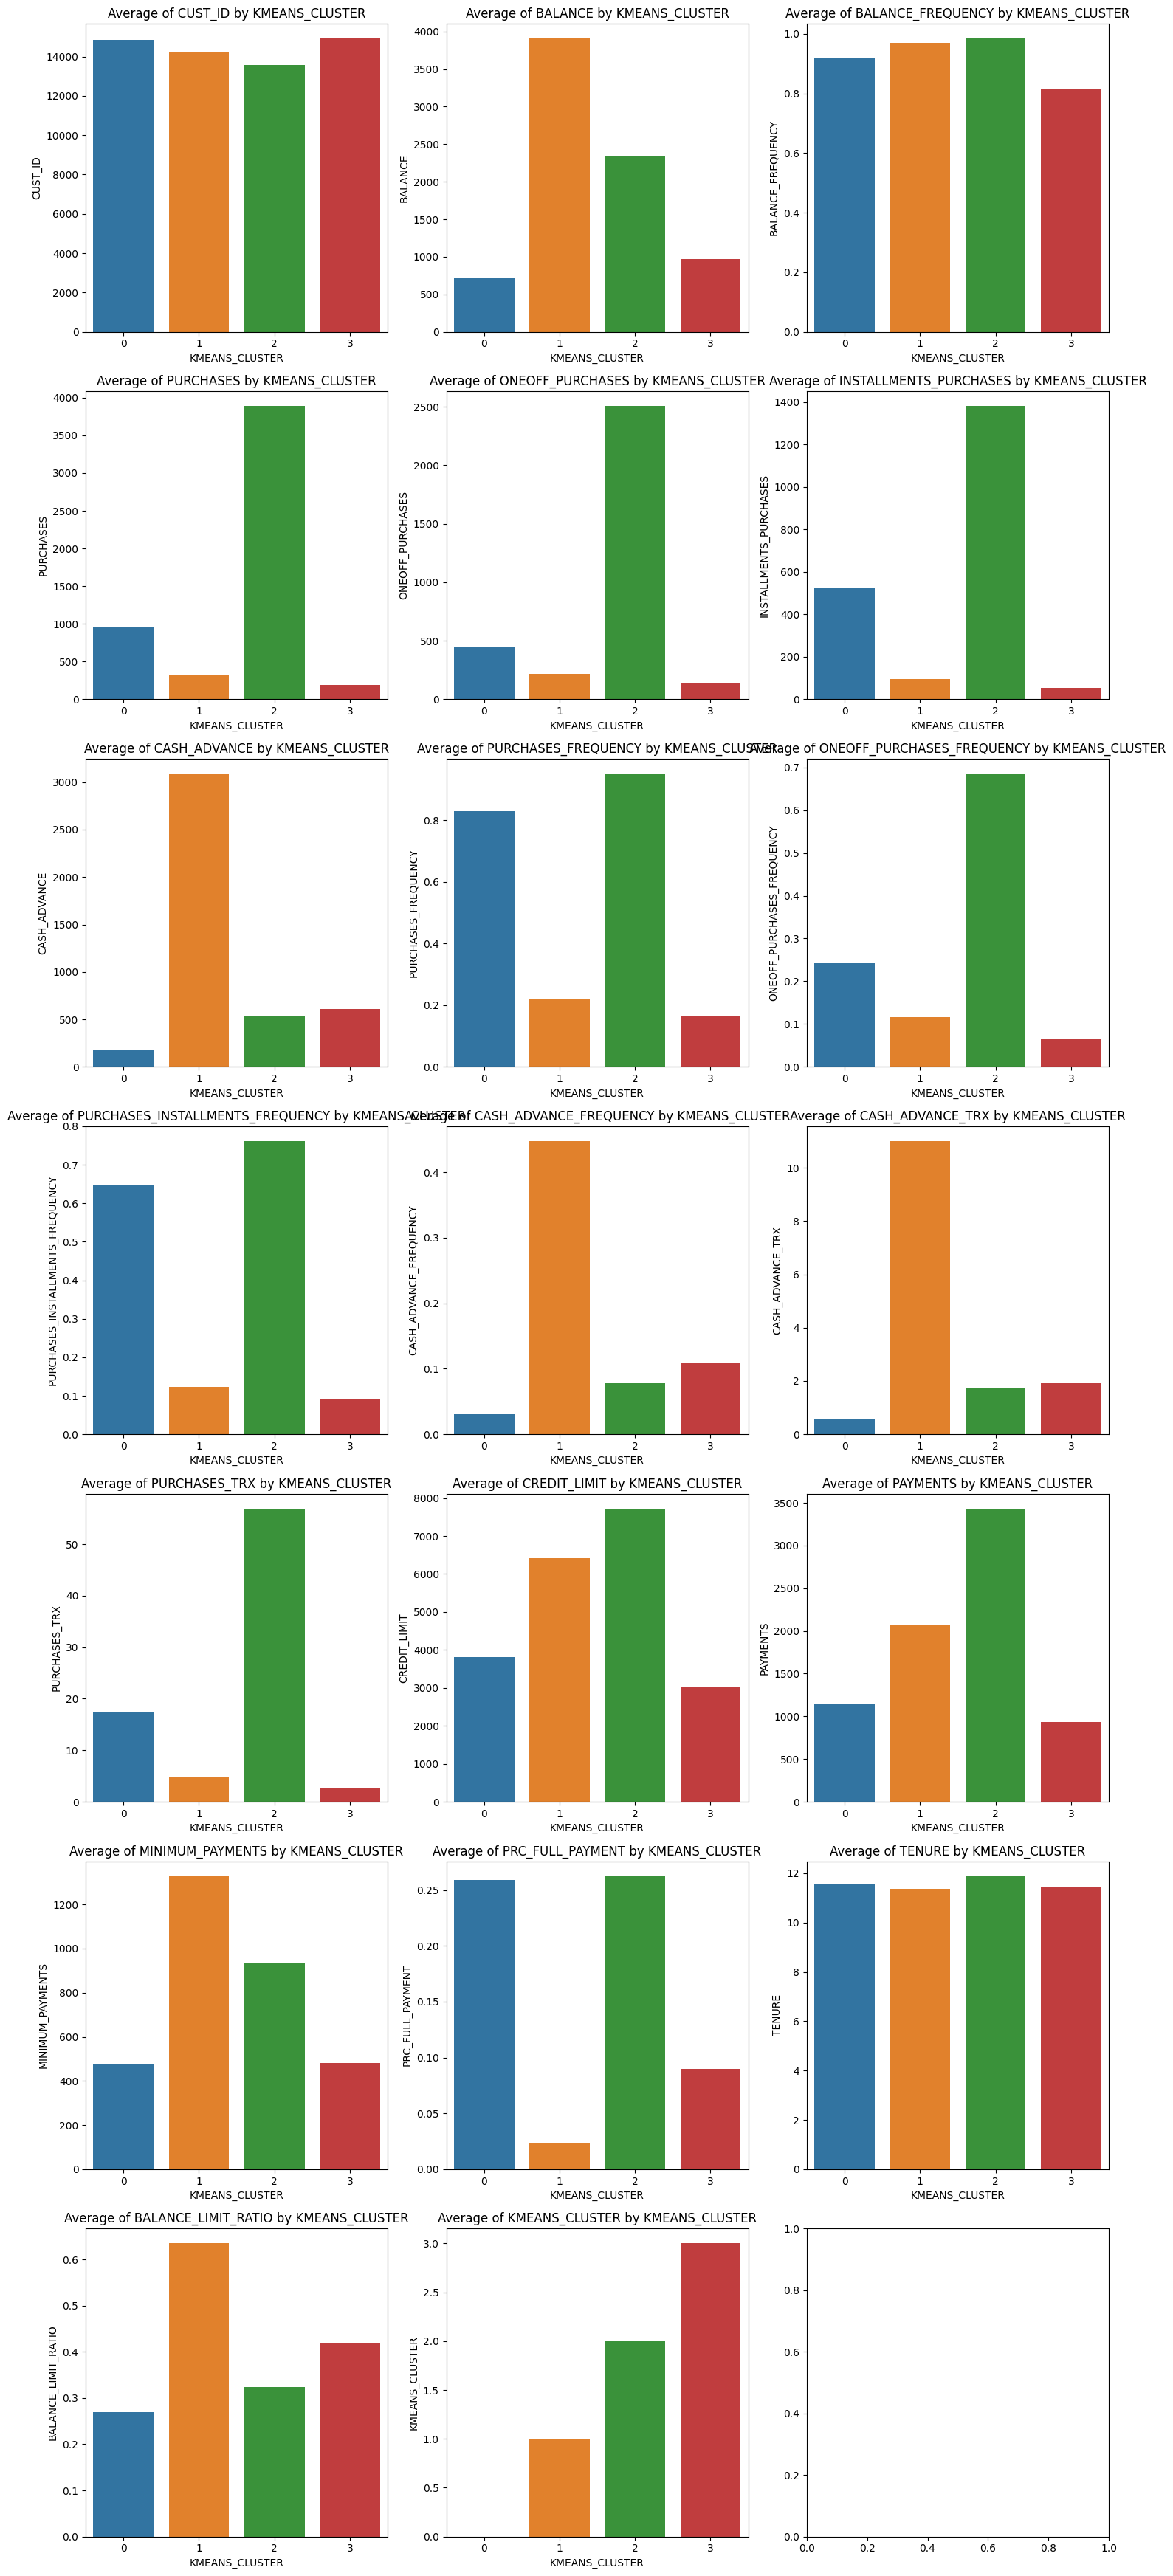

In [42]:
feature = df_km.columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(df.columns[:-1]):
    ax = axes.flatten()[i]
    sns.barplot(x='KMEANS_CLUSTER', y=feature, data=df_km, ax=ax)
    ax.set_title(f'Average of {feature} by KMEANS_CLUSTER')

plt.tight_layout()
plt.show()

I will do the same visual review of the mean shift clustering to see which one provides the best customer behavior insights from a business perspective.

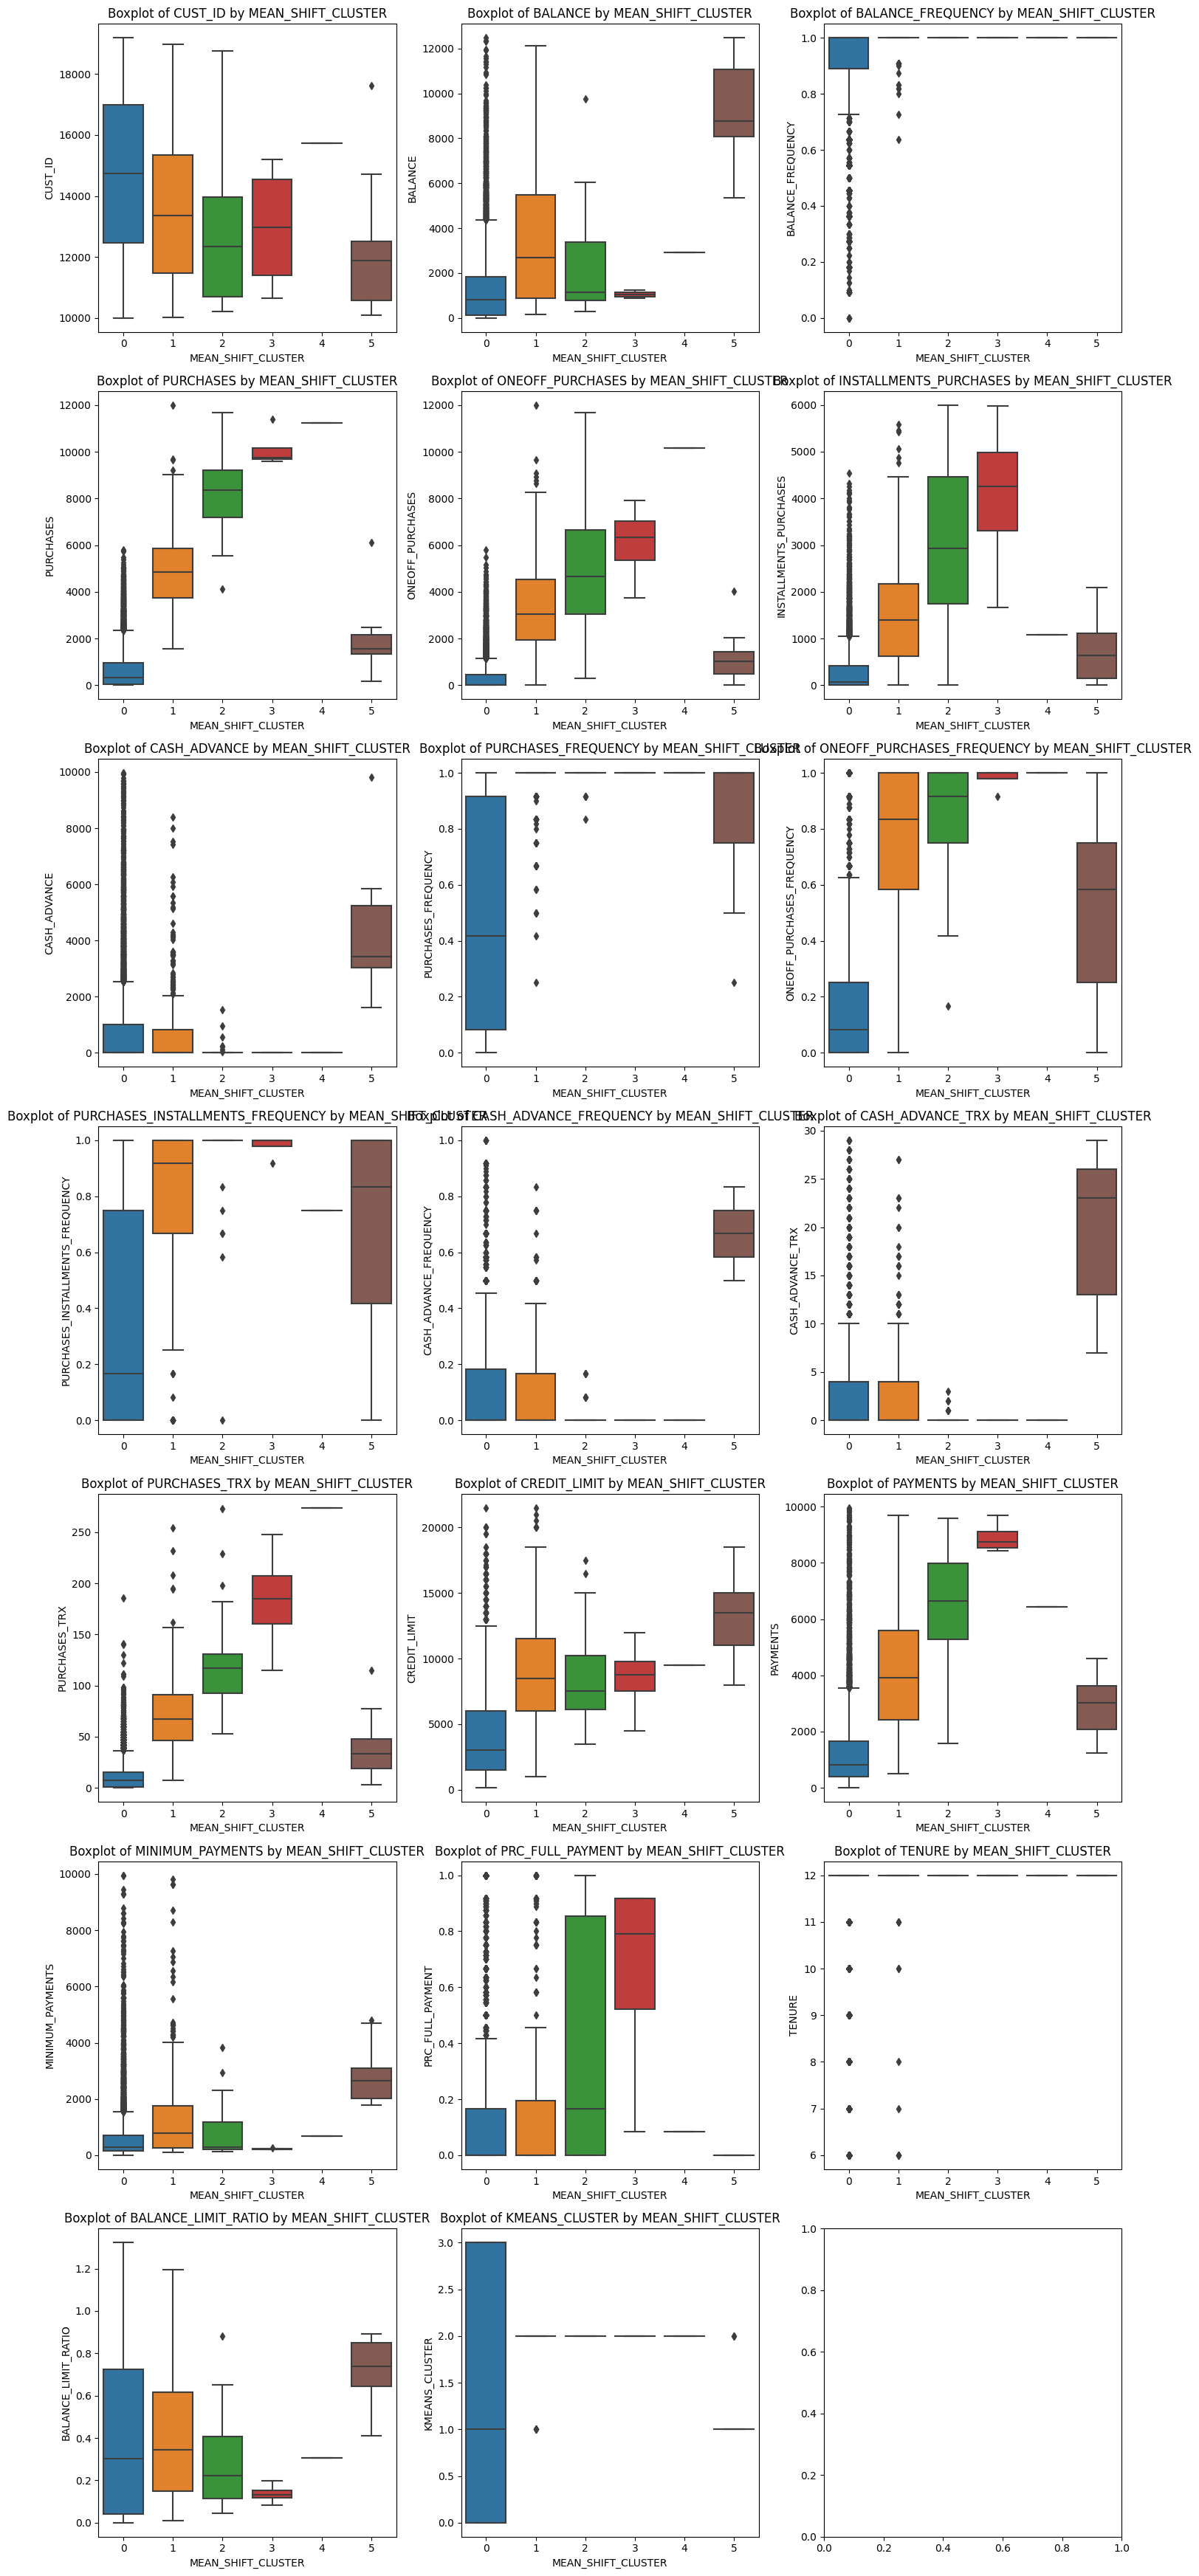

In [43]:
feature = df.columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(df.columns[:-1]):
    ax = axes.flatten()[i]
    sns.boxplot(x='MEAN_SHIFT_CLUSTER', y=feature, data=df, ax=ax)
    ax.set_title(f'Boxplot of {feature} by MEAN_SHIFT_CLUSTER')

plt.tight_layout()
plt.show()

In [44]:
df_ms = df.groupby('MEAN_SHIFT_CLUSTER').mean()
df_ms.reset_index(inplace=True)
df_ms

MEAN_SHIFT_CLUSTER       CUST_ID      BALANCE  BALANCE_FREQUENCY  \
0                   0  14709.362394  1363.815388           0.888694   
1                   1  13418.741830  3502.776478           0.992471   
2                   2  12618.387097  2481.756653           1.000000   
3                   3  12948.500000  1045.483958           1.000000   
4                   4  15731.000000  2901.999862           1.000000   
5                   5  12328.846154  9145.622484           1.000000   

      PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0    683.402657        372.174036              311.489867    808.943491   
1   4955.910523       3407.225458             1548.685065    815.710432   
2   8294.197742       5218.629677             3075.568065    119.016669   
3  10121.777500       6080.972500             4040.805000      0.000000   
4  11250.650000      10165.880000             1084.770000      0.000000   
5   1924.620769       1178.805385              745.815385   4232.330460   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  ...  \
0             0.475438                    0.178087  ...   
1             0.955397                    0.738756  ...   
2             0.986559                    0.846774  ...   
3             1.000000                    0.979167  ...   
4             1.000000                    1.000000  ...   
5             0.846154                    0.519231  ...   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.127322          2.722384      11.161584   4088.108767   
1                0.110552          2.781046      71.385621   9140.196078   
2                0.026882          0.354839     121.806452   8887.096774   
3                0.000000          0.000000     183.250000   8500.000000   
4                0.000000          0.000000     274.000000   9500.000000   
5                0.679487         20.384615      38.769231  13153.846154   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  \
0  1307.118469        620.846262          0.156204  11.515121   
1  4109.768955       1401.695847          0.215324  11.869281   
2  6282.310265        805.775052          0.391129  12.000000   
3  8895.834135        222.228541          0.645833  12.000000   
4  6443.381719        691.328423          0.083333  12.000000   
5  2943.256725       2846.447318          0.000000  12.000000   

   BALANCE_LIMIT_RATIO  KMEANS_CLUSTER  
0             0.386606        1.498798  
1             0.399847        1.986928  
2             0.276615        2.000000  
3             0.135866        2.000000  
4             0.305474        2.000000  
5             0.712927        1.153846  

[6 rows x 21 columns]

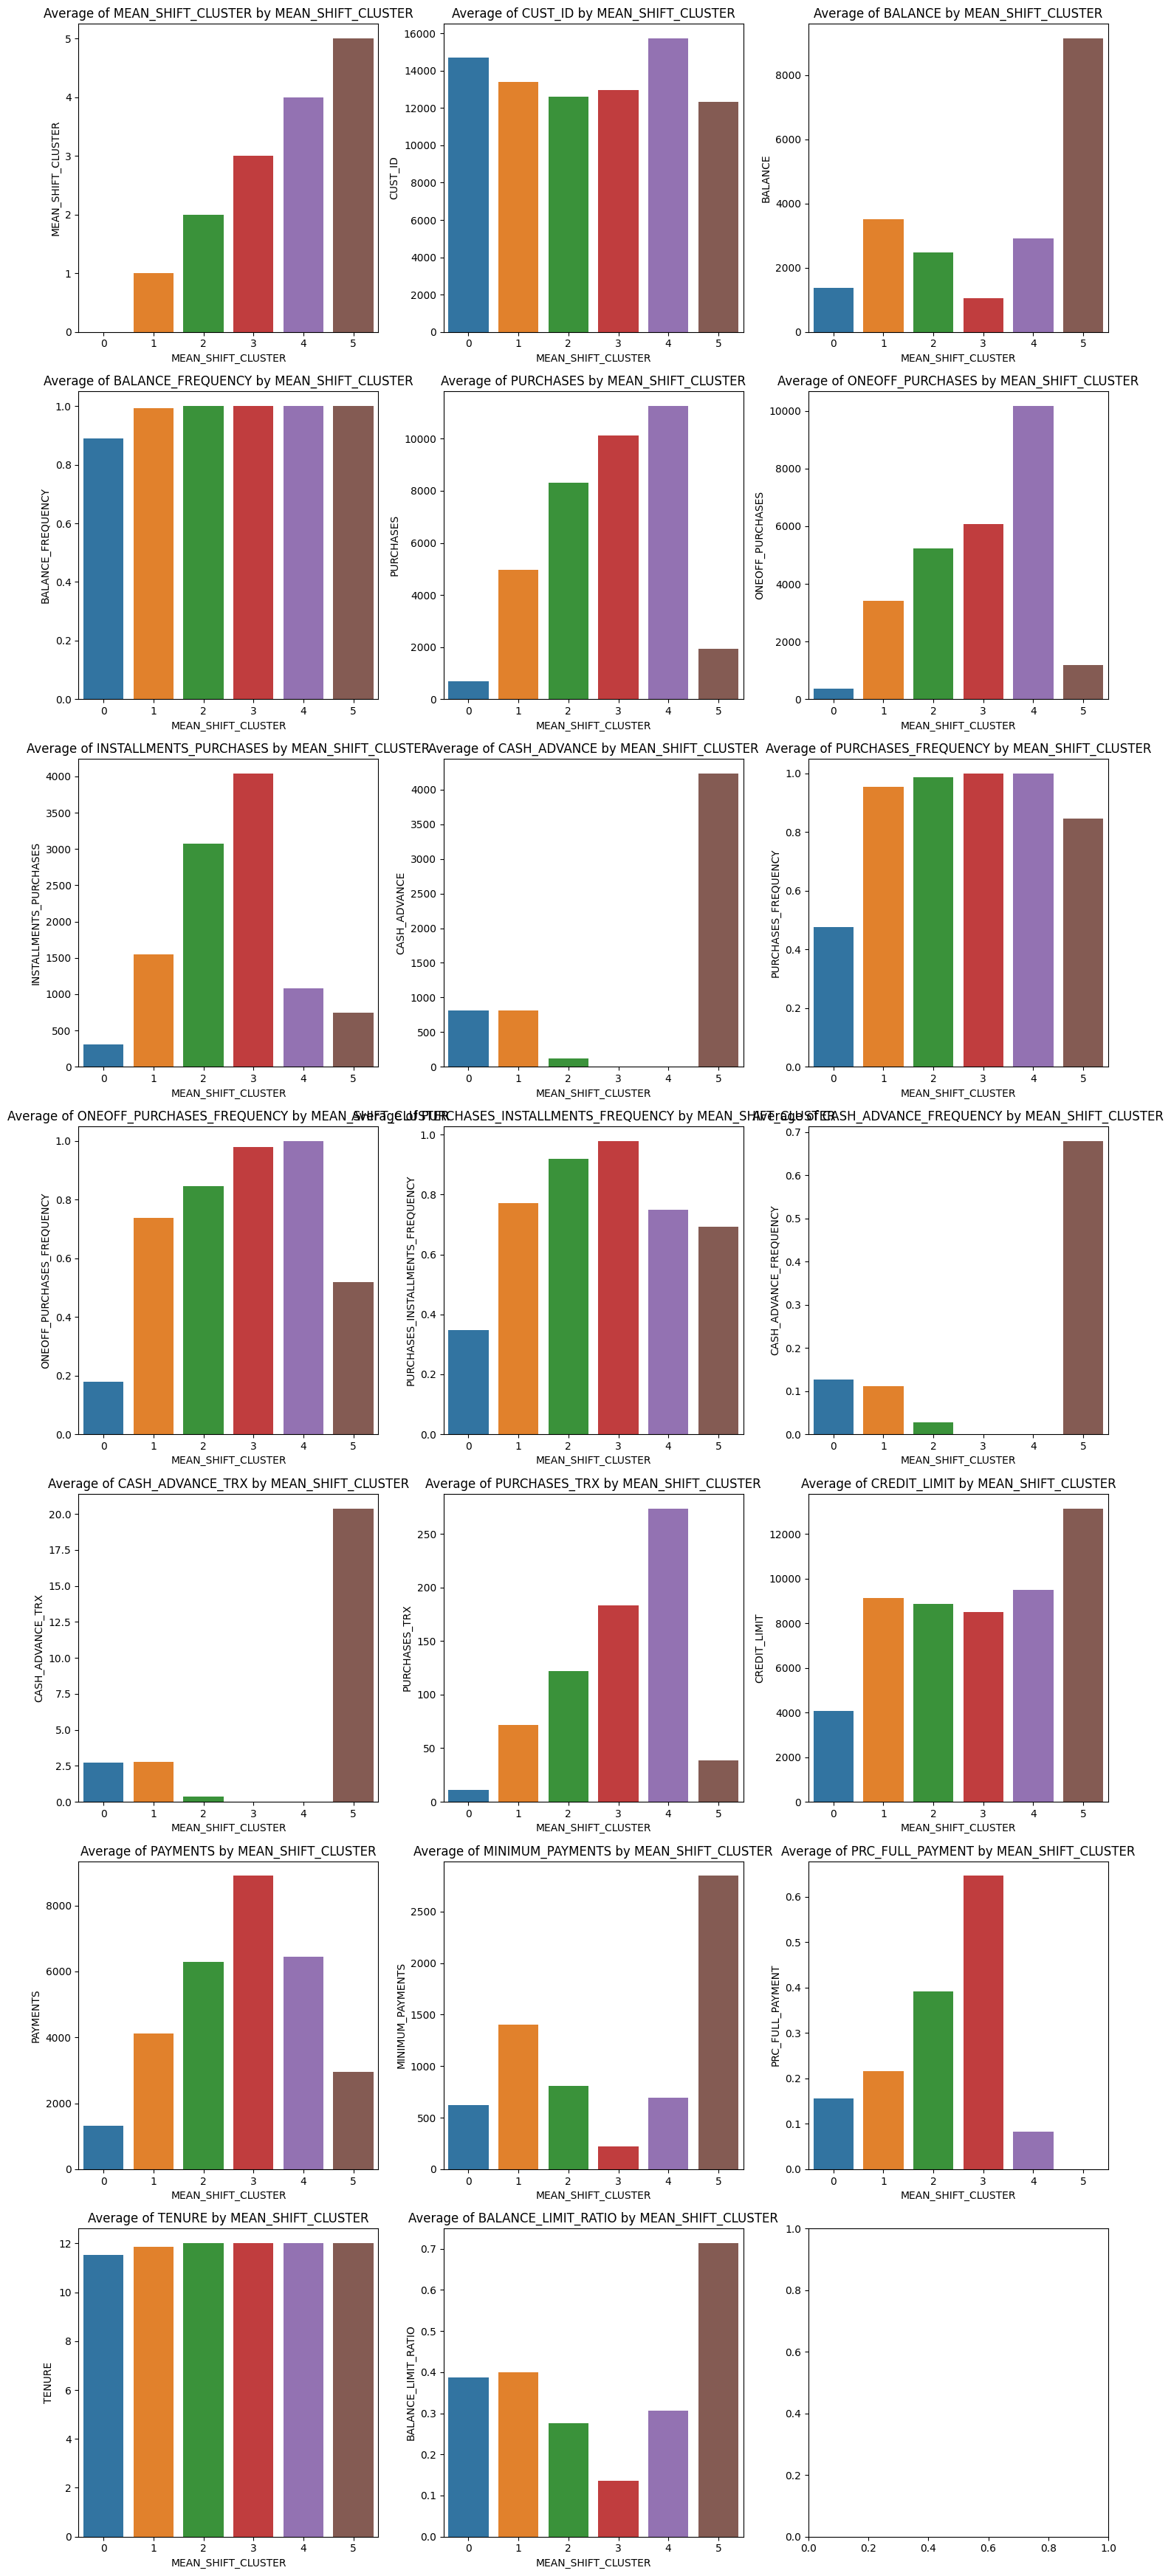

In [45]:
feature = df_ms.columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(df_ms.columns[:-1]):
    ax = axes.flatten()[i]
    sns.barplot(x='MEAN_SHIFT_CLUSTER', y=feature, data=df_ms, ax=ax)
    ax.set_title(f'Average of {feature} by MEAN_SHIFT_CLUSTER')

plt.tight_layout()
plt.show()

Although Mean Shift provides differentiating results between clusters, 6 clusters may be too much to really pinpoint each clusters unique behavior since they tend to vary a little more than K-Means. I will look to see the distribution of samples amongst the clusters to see which method best represents the separation of customers at a meaningful level.

In [46]:
df['MEAN_SHIFT_CLUSTER'].value_counts()

0    7903
1     306
2      31
5      13
3       4
4       1
Name: MEAN_SHIFT_CLUSTER, dtype: int64

In [47]:
df['KMEANS_CLUSTER'].value_counts()

3    3193
0    2975
1    1219
2     871
Name: KMEANS_CLUSTER, dtype: int64

While the Mean Shift clustering method gave the top silhouette score and does offer some good segmentation of customer behavior patterns, 4 of the 6 clusters it created have very small customer representation, and the majority of customers fall into either cluster 0 or 1. The insights generated from these clusters may thus not be as impactful on a macro level for the company. K_Means may have a slightly lower Silhouette Score, but it also did a good job of creating clusters where the behaviors of customers are well varied between them, and the clusters have strong amounts of sample support within each, making it more applicable in my opinion. I will move ahead with the K-Means clusters.

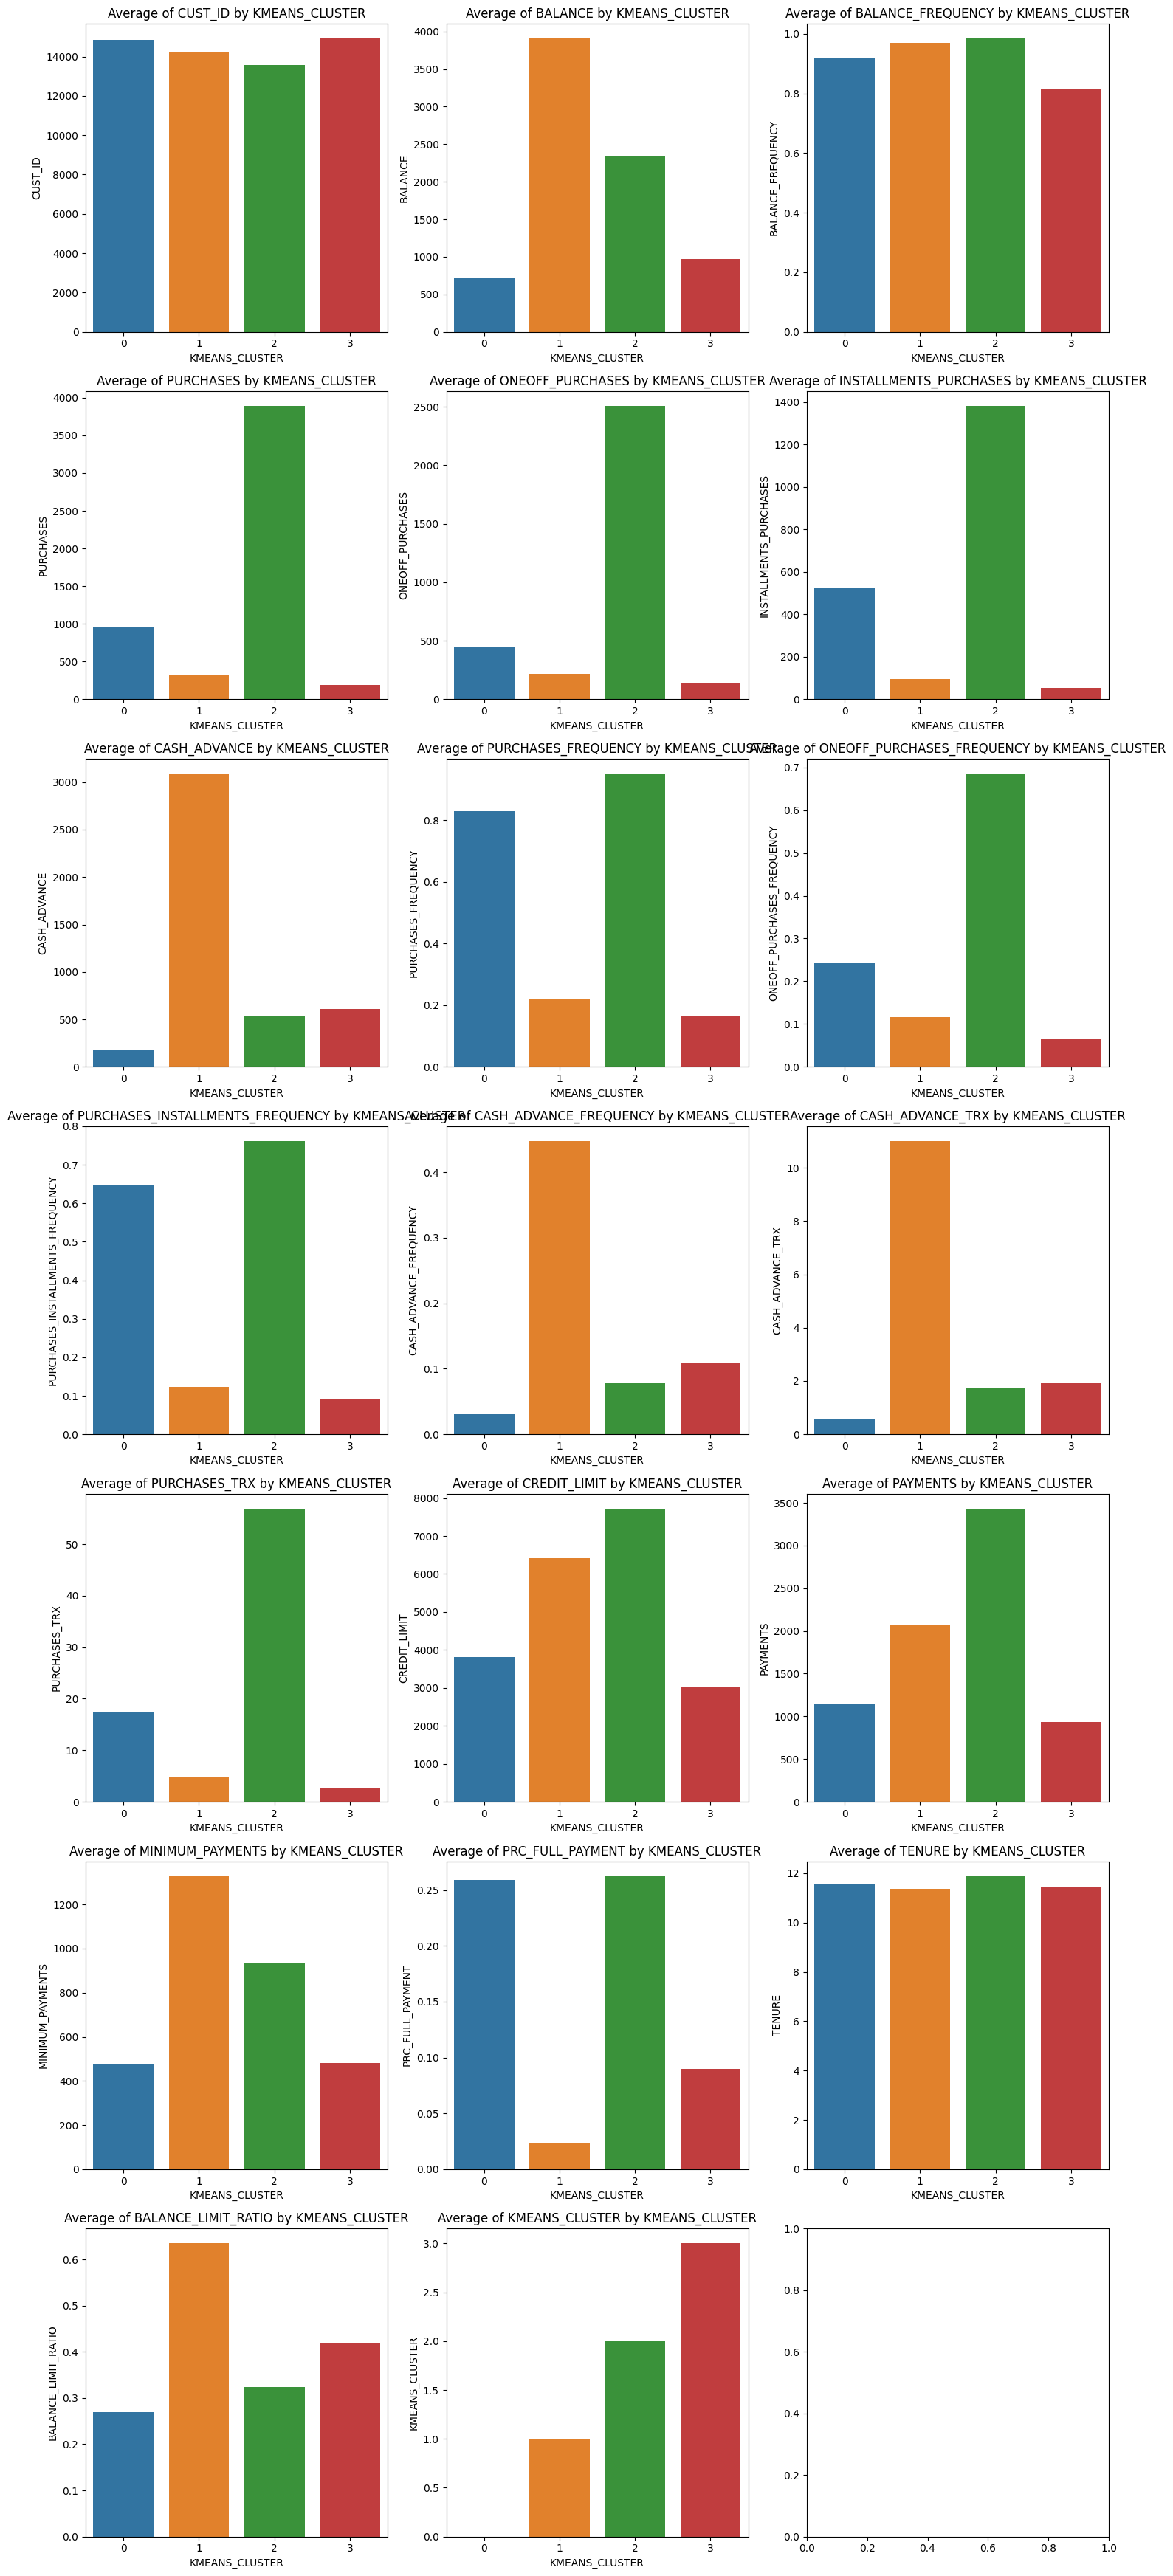

In [48]:
feature = df_km.columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(df.columns[:-1]):
    ax = axes.flatten()[i]
    sns.barplot(x='KMEANS_CLUSTER', y=feature, data=df_km, ax=ax)
    ax.set_title(f'Average of {feature} by KMEANS_CLUSTER')

plt.tight_layout()
plt.show()

**4. Interpreting Clusters [5 marks]:**

Characterize the clusters formed: What kind of customers fall into each cluster? What features are most significant in distinguishing between clusters?

When reviewing the average values of the 4 clusters determined by KMeans Clustering, there are a few pretty key customer takeaways that could be very useful. They are as follows:

1. The ones with the highest balance (cluster 1) are not the ones who purchase the most. In general, those with a middle amount of balance (cluster 2) are those who make the most purchases the most frequently.

2. Those with the highest balance on average tend to spend amounts on the lower end, however they also pay cash in advance on their amounts in higher rates than anyone else, while also making higher minimum payments than anyone else. This could suggest these customers are more financially responsible on average than other customers.

3. The high frequency, middle balance customers (cluster 2) pay off in full on a higher rate than anyone else, suggesting that although they purchase frequently, they tend to not be irresponsible with repayment. 

***Customer Segmentation Summary/Interpretation***

4. **Cluster 3** customers can be considered low volume/ low activity customers. They by far make purchases the least frequently, while also having the lowest level of credit available, even though their balance is only second lowest. This likely means that the credit card company is accurately classifying these customers as lower value and not providing more credit than is necessary for their value to the company. 

5. **Cluster 0** may be considered high value/ high risk customers. Although they tend to have the lowest available balance, they tend to also make purchases at the second highest rate of all customers. They also rarely pay cash in advance, and have the lowest minimum payment amounts compared to all other customers. This higher value/higher risk is likely reflected in their credit limit, with them on average being given the 2nd least amount of credit, more than the low volume customers, but less than the less risky customers.

6. **Cluster 1** could be considered low risk customers, with good repayment habits, good balance amounts, and lower tendency to purchase.

7. **Cluster 2** could be considered the sweet spot, high value, medium risk. They have the highest purchasing frequency, second highest balance compared to other comeptitors, second highest minimum payment amounts, and the highest rate of full payment. In general, these customers would be higher risk than cluster 1 since they spend very frequently and have slightly lower balances, but would likely bring the most value to the company, without the risk associated with customers in cluster 0.

**5. Actionable Insights [5 marks]:**

Provide business recommendations based on the clusters formed. How would you target different customer segments?


**Cluster 2 | High Value, Medium Risk**

With these takeaways, targetting cluster 2 with providing additional credit may entice them to purchase more and thus offering more value to the company. Since they are likely to repay, but possibly not as consistently or as early as customers in cluster 1, this may bring in additional revenue for the company through interest charged. The company could continue to entice more spending by offering incentives and points for purchase frequency, while also perhaps bringing in additional revenue through benefit partnership programs with companies who want buyers that are willing to pay frequently for lower priced goods. Partnerships with grocery stores, clothing retailers, entertainment companies - businesses where customers tend to purchase often could be a good opportunity to gain additional value from these customers.


**Cluster 1 | Low Risk, High Value Potential**

Cluster 1 could be enticed to purchase more perhaps with improving the credit card benefits that they are offered. These are likely savy financial customers who tend to make wise financial decisions, so if the credit card can benefit them beyond simply offering them a way to make purchases (Rewards, AirMiles, cashback, points) the company could likely boost their payment frequency, improving the value to the company and allowing the company to possibly make more partnerships with benefit sponsors who want to target these financially responsible consumers. The company should look to target these customers by making the use of their credit card seem like the more financially responsible option for them. This should be effective at raising the use rates.


**Cluster 0 | High Value, High Risk**

For Cluster 0 customers, higher interest rates could be charged to hedge against the risky repayment behavior they have. Higher interest may intice them to improve their repayement patterns, while also ensuring if they miss payments, the company is being compensated for that risk of non-repayment/late payment. Providing them with credit is still beneficial to the company since they are active spenders, however the company should ensure risk mitigation tactics are in place for these customers.


**Cluster 3 | Low Activity, Low Value**

Cluster 3 customers need to be enticed to spend more in general to improve their value. In general, they dont purchase much, and they also don't carry much balance. Enticing them to buy more and demand higher credit limits could be acheived through benefit partners or improved incentives such as minimum usage requirements or lower interest rates on higher frequency purchases. The comany may want to get these customers on a card that has monthly or yearly service charges to ensure they are extracting some value from these customers even if they don't use their cards. This will help hedge against the service costs that the company takes on from servicing credit to these types of customers. These customers could also be prompted to use their cards more if minimum usage requirements are placed or if monthly service charges are being charged for inactive users.